---
<h1><center><b>AI Modules running Scan, ECG, and Chatbot</b></center></h1>
<h3><center><b>Abdallah Fekry Mohammed</b></center></h3>
<h3><center><b>I Care</b></center></h3>

---

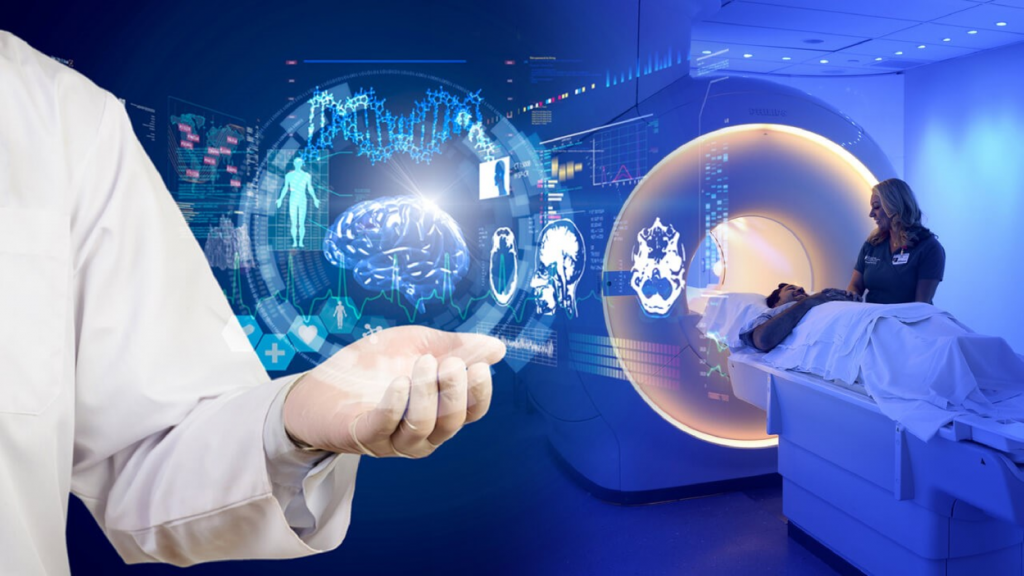

---

# AI Models Table
### Names - Input/Output - Functionality - Accuracy

![alt text](<models table.png>)

# AI Scan Models Series

![alt text](<AI Mindmap-1.jpg>)

---

## Importing Liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
import pickle
import nltk
import random
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
# from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [2]:
scan_info = {"Avulsion fracture": """Overview
- What is an avulsion fracture?
Avulsion fractures happen when a bone fragment separates from the rest of the bone. In children, they are most common in sports like soccer, football, gymnastics, and other sports that involve sudden changes in direction, leaping, and kicking. Avulsion fractures are most common around the hip or pelvis but can also occur in the ankle, foot, finger, elbow, or knee.

Avulsion fractures occur most frequently in female athletes between the of ages 13 and 14 and in male athletes between the ages of 15 and 17.

Avulsion Fracture |Symptoms & Causes
- What causes avulsion fractures?
To understand avulsion fractures, it helps to understand the interactions between tendons, muscles, and bones. Tendons connect muscles to bones. When a soccer player kicks a ball, for instance, their muscles provide the power while their tendons transfer this power to their bones, moving the leg so that it sends the ball down the field.

Avulsion fractures happen when a set of muscles puts more pressure on the bone than the bone can withstand. As youth sports have become more competitive, many young athletes are developing extremely strong muscles. When a muscle is stronger than the bone it’s attached to, it becomes more likely that the force of the tendon can cause a small piece of bone to break away from the rest of the bone.

In addition to the rapid development of muscle strength during adolescence, the rapid rate of growth during childhood and adolescence can lead to tighter muscles and tendons in young athletes, which can result in increased tension on the location where the tendon attaches to the bone.

In growing athletes, avulsion fractures typically occur around soft areas of cartilage called apophyses — areas of the skeleton where the bone is rapidly developing and not yet fully ossified (hardened). Once a child reaches mature height, these areas become as strong as the rest of the bone, but until then, the apophyses are prone to injury.
             
- you can see more information here: https://www.childrenshospital.org/conditions/avulsion-fracture""",
             "Comminuted fracture": """Overview
- What is a comminuted fracture?
Comminuted (pronounced “kah-meh-noot-ed”) fractures are a type of broken bone. The term comminuted fracture refers to a bone that is broken in at least two places. These fractures can affect any large or long bone in your body. Some of the most common include:

Femur (thigh).
Tibia (shin).
Fibula (calf).
Humerus (upper arm).
Radius and ulna (forearm).
Clavicle (collarbone).
Skull.
Comminuted fractures are almost always caused by serious traumas like car accidents or falls from a high place. They are very serious in large bones, and you will often need surgery to repair your bones. Sometimes, comminuted fractures happen to smaller bones and can heal without surgery. How long it takes to recover depends on which of your bones are fractured and what caused the breaks. Most people need up to a year to recover from a comminuted fracture if it involved one of the long or larger bones in your body, especially if it requires surgery.

Symptoms and Causes
- What are the symptoms of a comminuted fracture?
If you have a comminuted fracture, you’ll also likely experience serious symptoms of the trauma that caused it. Your symptoms will depend on the other injuries you have. But, in general, the symptoms of a comminuted fracture can include:

Intense pain.
Not being able to move a part of your body you normally can.
A part of your body is noticeably different looking or out of its usual place.
Seeing your bone through your skin.
Swelling.
Bruising.

- you can see more information here: https://my.clevelandclinic.org/health/diseases/22252-comminuted-fracture""",
             "Compression-Crush fracture": """Overview
- What is a compression fracture?
Compression fractures are small breaks or cracks in the vertebrae (the bones that make up your spinal column). The breaks happen in the vertebral body, which is the thick, rounded part on the front of each vertebra. Fractures in the bone cause the spine to weaken and collapse. Over time, these fractures affect posture. The spine curves forward and the person looks “hunched over” (kyphosis).

Compression fractures usually happen in the thoracic (middle) part of the spine, especially in the lower thoracic area. Providers also call them vertebral compression fractures (VCF). They often result from osteoporosis. But they can also happen after trauma (such as a car crash) or as a result of tumors on the spine.

Providers treat compression fractures with medications and a special type of back brace. Some people require a minimally invasive procedure to strengthen the vertebrae and stabilize their spine.

Symptoms and Causes
- What are the symptoms of compression fractures?
Compression fracture symptoms range from mild to severe. Some people may not have symptoms. Their provider may discover the fracture when they do an X-ray for another condition. But many people are unable to stand or walk without pain. Symptoms of a fractured spine include:

Back pain, which can come on suddenly and last a long time (chronic back pain). It usually develops anywhere between the shoulders and the lower back. Pain usually gets better when you lie down, and it worsens when you stand or walk.
Decreased mobility or flexibility in the spine. You may not be able to twist or bend over.
Hunched over appearance (some people call this curved upper back a “dowager’s hump” or hunchback).
Loss of height as the vertebrae compress and the back curves.
Pinched nerves and nerve damage, which can cause tingling and numbness in the back and difficulty walking.
Problems controlling the bladder or bowels (these symptoms happen with severe, untreated fractures).

- you can see more information here: https://my.clevelandclinic.org/health/diseases/21950-compression-fractures""",
             "Fracture Dislocation": """Overview
- Dislocations or Fractures
Two of the most common bone and joint injuries are dislocations and fractures.

A dislocation occurs when two bones slip out of place at the joint that connects them. It’s usually caused by a sudden impact from a blow, fall or other trauma. You can dislocate almost any joint in your body— your ankles, knees, shoulders, hips, elbows or jaw. You can even dislocate your finger and toe joints.

When more pressure is put on a bone than it can stand, the bone may split or break. A break of any size is referred to as a fracture. It can result from a fall, trauma, accident, direct blow or repetitive stress, as well as numerous medical conditions that weaken bones.

- Dislocation and Fracture Symptoms
It’s hard to identify a dislocated joint from a bone fracture. Symptoms of both include:
A visibly out-of-place or misshapen limb
Swelling, bruising or bleeding
Intense pain
Numbness and tingling
Broken skin with bone protrusion
Loss of motion

- you can see more information here: https://www.summahealth.org/orthopedic/our-services/sports-medicine/dislocations-or-fractures""",
             "Greenstick fracture": """Overview
- What are greenstick fractures?
A greenstick fracture is a type of bone fracture (broken bone). Greenstick fractures happen when something bends a bone enough to crack it without breaking it into multiple pieces.

Greenstick fractures get their name from the shape (pattern) of the break in your bone. Picture the difference between snapping a young, green twig and an older, dried out branch. Green twigs bend without snapping, but — at a certain point — they crack or splinter where you’re bending them. Older branches snap cleanly apart. Greenstick fractures are the same as bending that young twig — a break along one side of a bone that doesn’t snap it into more than one piece.

Almost all greenstick fractures happen to children younger than 10 because kids have softer and less brittle bones than adults.

Your child will probably need to wear a cast while their bone heals after a greenstick fracture. More severe fractures require surgery to repair — especially if they have other injuries.

Types of greenstick fractures
Greenstick fractures usually affect longer bones, including your:

Humerus (upper arm bone).
Radius and ulna (forearm bones).
Phalanges (finger and toe bones).
Femur (thigh bone).
Fibula (calf bone).

Symptoms and Causes
- What are greenstick fracture symptoms?
The most common greenstick fracture symptoms include:

Pain.
Bruising or discoloration.
Tenderness.
Swelling.
Part of your child’s body looking more bent or twisted than usual.

- you can see more information here: https://my.clevelandclinic.org/health/diseases/17812-greenstick-fractures""",
             "Hairline Fracture": """Overview
- What is Hairline Fracture?
Hairline or stress fractures are tiny cracks on a bone that often develop in the foot or lower leg. The most significant risk for a hairline fracture is playing high impact sports that involve repetitive jumping or running.

Hairline fractures may also occur in the upper limb and are often related to falls or accidents.

Hairline fractures usually develop gradually as a result of overuse, as opposed to larger bone fractures or breaks that are mostly caused by acute traumas, such as a fall. While hairline fractures may heal with sufficient rest, they can be painful and last several weeks.

Anyone who engages in regular physical activity can develop a hairline fracture, especially if the activity involves repetitive movements that put a strain on a bone or a group of bones. The most common treatment approach is rest.

- Symptoms
Symptoms are different from those of a more severe fracture or break when a person often feels a sharp pain immediately.

The pain from a hairline fracture will intensify when the person engages in activities that put a strain on the injured bone. This can inhibit a person’s mobility, which means they will be restricted as to how much weight they can put on the affected area.

Other symptoms may include:

swelling
bruising
tenderness

- you can more information here: https://www.medicalnewstoday.com/articles/319822#symptoms""",
             "Impacted fracture": """Overview
What is an Impaction Fracture?
An impaction fracture, also called a torus or buckle fracture, is one of the more “subtle” types of fractures that can affect children. Impaction fractures happen when a bone is compressed. This puts pressure on the area, therefore causing parts of the bone to crumble under the weight of the compression. Children are prone to this type of injury because their bones are still developing, which means their bones are softer and more malleable than adult bones.

Signs and Symptoms
Impaction fractures are incomplete breaks, which means that they do not cause a deformed appearance. Therefore, they usually don’t look like broken bones at all. Pain, pressure, swelling, and bruising are all common symptoms of this injury. If your child complains of these problems, especially after hurting themselves, then get the area examined by a professional.

Treatment and Recovery
Any type of broken bone can be scary for children- and also for their parents. Luckily though, impaction fractures are common injuries and your child should make a full recovery. However, getting the right treatment is important for both comfort and healing. Usually, these breaks are treated with a simple splint, though a cast might also be used. Properly setting the bone and resting the area will help your child heal.

you can see more information here: https://www.emergencyhospitals.care/whats-an-impaction-fracture-learn-about-this-common-childhood-injury-2/""",
             "Intra-articular fracture": """Overview
An intraarticular fracture is a fracture that crosses a joint surface. Such fractures also involve some cartilage damage. Fractures to joints are more complicated to treat and heal than simple fractures, as multiple bones are involved. Bone fragments inside the damaged joint may impede healing time and efficacy. Often, ligaments are torn or separated from the joint surfaces as well, also impeding the healing process.

Common areas of intraarticular fracture include the:
Shoulder - may involve the humerus, scapula and acromion and coracoid processes, as well as the glenoid and articular cartilage
Hip - - may involve some portion of the pelvis and the upper neck or head of the femur, as well as the hip's articular cartilage
Elbow - may involve the lower end of the humerus, the upper end of the radius and the ulnar collateral ligament as well as cartilage between the bones
Wrist - may involve the lower ends of the radius and the ulna, and the carpal bones, as well as cartilage found between each of the small bones of the carpals
Knee - may involve the lower end of the femur, the patella or knee cap, and the upper ends of the tibia and/or fibula as well as articular cartilage and collateral ligaments
Ankle - may involve the lower end of the tibia or fibula, the subtalar joint and the articular cartilage and the anterior tibiofibular and lateral collateral ligaments

Causes
Blunt force trauma
Automobile accidents

Symptoms
Pain
Limited use or range of motion
Weakness
Swelling
Bruising

Treatment
Immobilization is the first step toward stabilizing the joint. Following imaging, the doctor will attempt to realign bones in their proper place. If torn ligaments are observed, or bones have been shattered or pieces badly damaged, surgery will be required for proper reconstruction of the affected joint.

- you can see more information here: https://www.faoconline.com/home/conditions/shoulder/intraarticular-fractures
""",
             "Longitudinal fracture": """Overview
What is Longitudinal fracture?
Longitudinal fractures are fractures that occur along (or nearly along) the axis of the bone. This is most often used in the context of a long-bone fracture although traditional classification of temporal bone fractures also used this term.

Signs and Symptoms
- pain

- swelling

- bruising

- discolored skin around the affected area

- protrusion of the affected area at an unusual angle

- inability to put weight on the injured area

- inability to move the affected area

- a grating sensation in the affected bone or joint

- bleeding if it is an open fracture

Treatment
Bone healing is a natural process that, in most cases, will occur naturally. Therefore, treatment typically focuses on providing the injured bone with the best circumstances for healing, and ensuring optimal future function.
For the natural healing process to begin, a doctor will reduce the fracture. This involves lining up the ends of the broken bones. In smaller fractures, a doctor can do this by manipulating the affected area externally. However, in some instances, this may require surgery.
Once a medical professional has aligned the fracture, they will ensure it stays in place. Methods of doing so includes:
casts or braces
metal plates and screws
intramedullary nails, or rods, placed in bone cavities
external fixings

you can see more information here: https://quizlet.com/ca/624720814/longitudinal-fracture-flash-cards/""",
             "Oblique fracture": """Overview
What is an oblique fracture?
Oblique fractures are a type of broken bone. They happen when one of your bones is broken at an angle. You might see oblique fractures referred to as complete fractures. This means the line of the break goes all the way through your bone.

Oblique fractures usually affect long bones in your body. Some of the most common include:

Femur (thigh).
Tibia (shin).
Fibula (calf).
Humerus (upper arm).
Radius and ulna (forearm).
Clavicle (collarbone).
Oblique fractures are almost always caused by falls or other traumas. You might need surgery to repair your bone. Some people only need a splint or cast for the bone to heal. How long it takes to recover fully depends on which of your bones are fractured — and what caused the breaks. Most people need a few months to recover from an oblique fracture.

Symptoms and Causes
What are the symptoms of an oblique fracture?
Symptoms of an oblique fracture include:

Pain.
Swelling.
Tenderness.
Inability to move a part of your body that you usually can.
Bruising or discoloration.
A deformity or bump that’s not usually on your body.

- you can see more information here: https://my.clevelandclinic.org/health/diseases/22185-oblique-fracture""",
             "Pathological fracture": """Overview
Pathologic = having to do with a pathology (a disease)
Fracture = a break in a bone

A pathologic fracture is a break in a bone that is caused by an underlying disease. At the Spine Hospital at the Neurological Institute of New York, we specialize in pathologic fractures of vertebrae, or bones of the spine.

For the most part, bones need a reason to break–for example, a significant trauma. However, some pathologies (diseases) weaken the bones of the spine. Forces as slight as the weight of the body or a minor trauma that would otherwise be tolerated can cause a fracture in the diseased bone.

Symptoms
Pathologic vertebral fractures may or may not cause symptoms. If pathologic fractures cause symptoms, these may include:

pain in back, legs, and arms
neurological impairment–such as numbness and/or weakness in the arms or legs (if the fracture has affected the spinal cord and/or nerves in the spine)

you can see more information here: https://www.neurosurgery.columbia.edu/patient-care/conditions/pathologic-fracture""",
             "Spiral Fracture": """Overview
What is a spiral fracture?
Spiral fractures are a type of broken bone. They happen when one of your bones is broken with a twisting motion. They create a fracture line that wraps around your bone and looks like a corkscrew. You might see spiral fractures referred to as complete fractures. This means the line of the break goes all the way through your bone.

Spiral fractures usually affect long bones in your body. Some of the most common include:

Femur (thigh).
Tibia (shin).
Fibula (calf).
Talus (ankle).
Humerus (upper arm).
Radius and ulna (forearm).
Phalanges and metacarpals (fingers and hand).
Spiral fractures are almost always caused by falls or other traumas. You might need surgery to repair your bone. How long it takes to recover fully depends on which of your bones are fractured — and what caused the breaks. Most people need a few months to recover from a spiral fracture.

Symptoms and Causes
What are the symptoms of a spiral fracture?
Symptoms of a spiral fracture include:

Pain.
Swelling.
Tenderness.
Inability to move a part of your body that you usually can.
Bruising or discoloration.
A deformity or bump that’s not usually on your body.

- you can see more information here: https://my.clevelandclinic.org/health/diseases/22241-spiral-fracture""",
             "glioma_tumor": """Overview
What is a glioma?
Glioma is a common type of tumor originating in the brain. About 33 percent of all brain tumors are gliomas, which originate in the glial cells that surround and support neurons in the brain, including astrocytes, oligodendrocytes and ependymal cells.

Gliomas are called intra-axial brain tumors because they grow within the substance of the brain and often mix with normal brain tissue.

What are the symptoms of glioma?
Gliomas cause symptoms by pressing on the brain or spinal cord. The most common, including glioblastoma symptoms are:

Headaches

Seizures

Personality changes

Weakness in the arms, face or legs

Numbness

Problems with speech

Other symptoms include:

Nausea and vomiting

Vision loss

Dizziness

Glioblastoma symptoms and other symptoms of glioma appear slowly and may be subtle at first. Some gliomas do not cause any symptoms and might be diagnosed when you see the doctor about something else.

- you can see more information here: https://www.hopkinsmedicine.org/health/conditions-and-diseases/gliomas""",
             "meningioma_tumor": """Overview
What Is Meningioma?
A meningioma is a tumor that arises from the meninges — the membranes that surround your brain and spinal cord. Although not technically a brain tumor, it is included in this category because it may compress or squeeze the adjacent brain, nerves and vessels. Meningioma is the most common type of tumor that forms in the head.

Most meningiomas grow very slowly, often over many years without causing symptoms. But in some instances, their effects on adjacent brain tissue, nerves or vessels may cause serious disability.

Meningiomas occur most commonly in women, and are often discovered at older ages, but a meningioma may occur at any age.

Symptoms of Meningioma
Signs and symptoms of a meningioma typically begin gradually and may be very subtle at first. Depending on where in the brain or, rarely, spine the tumor is situated, signs and symptoms may include:

Changes in vision, such as seeing double or blurriness
Headaches that worsen with time
Hearing loss or ringing in the ears
Memory loss
Loss of smell
Seizures
Weakness in your arms or legs
Causes of Meningioma
It isn't clear what causes a meningioma. Doctors know that something alters some cells in your meninges to make them multiply out of control, leading to a meningioma tumor.

you can see more information here: https://www.pennmedicine.org/for-patients-and-visitors/patient-information/conditions-treated-a-to-z/meningioma""",
             "pituitary_tumor": """Overview
Pituitary tumors are unusual growths that develop in the pituitary gland. This gland is an organ about the size of a pea. It's located behind the nose at the base of the brain. Some of these tumors cause the pituitary gland to make too much of certain hormones that control important body functions. Others can cause the pituitary gland to make too little of those hormones.

Most pituitary tumors are benign. That means they are not cancer. Another name for these noncancerous tumors is pituitary adenomas. Most adenomas stay in the pituitary gland or in the tissue around it, and they grow slowly. They typically don't spread to other parts of the body.

Pituitary tumors can be treated in several ways. The tumor may be removed with surgery. Or its growth may be controlled with medications or radiation therapy. Sometimes, hormone levels are managed with medicine. Your health care provider may suggest a combination of these treatments. In some cases, observation — also called a ''wait-and-see'' approach — may be the right choice.

Symptoms
Not all pituitary tumors cause symptoms. Sometimes these tumors are found during an imaging test, such as an MRI or a CT scan, that is done for another reason. If they don't cause symptoms, pituitary tumors usually don't need treatment.

Pituitary tumor symptoms may be caused by a tumor putting pressure on the brain or on other parts of the body nearby. Symptoms also can be caused by a hormone imbalance. Hormone levels can rise when a pituitary tumor makes too much of one or more hormones. Or a large tumor that disrupts the way the pituitary gland works may cause hormone levels to fall.

Symptoms from tumor pressure
Macroadenomas can put pressure on the pituitary gland, on nerves, on the brain and on other parts of the body nearby. That can cause symptoms such as:

Headache.
Eye problems due to pressure on the optic nerve, especially loss of side vision, also called peripheral vision, and double vision.
Pain in the face, sometimes including sinus pain or ear pain.
Drooping eyelid.
Seizures.
Nausea and vomiting.

- you can see more infromation here: https://www.mayoclinic.org/diseases-conditions/pituitary-tumors/symptoms-causes/syc-20350548""",
             "Cyst": """Overview
A cyst is an abnormal pocket of fluid, like a blister, that can form in many different areas of the body including the skin, genitals and internal organs. A cyst can vary in size from a tiny sac right up to a heavy bag containing litres of fluid. The common symptom is swelling around the area, but a cyst may or may not be painful. Sometimes, depending on the cause and location, a cyst contains semi-solid or solid material.

The typical treatment for any cyst is removal by surgery and a routine test for cancer, even though most cysts are benign. All unusual lumps need to be investigated by a qualified health professional.

Causes of cysts
Most cysts form for no apparent reason. Some of the known causes of cysts include:
Blocked ducts, which cause a build-up of fluid
A defect in the cells
An impact injury that pops a blood vessel
A parasite.
Different cysts and treatment
Some of the different types of cysts include:
Arachnoid cyst – the arachnoid membrane covers the brain. A baby may be born with an arachnoid cyst. It is caused by the arachnoid membrane doubling up or splitting to form an abnormal pocket of cerebrospinal fluid. This can be treated by surgical drainage if necessary.
Bartholin’s cyst – the Bartholin glands are situated inside the vagina. A cyst occurs if the ducts become blocked. Treatment includes surgery and antibiotics.
Breast cyst – these cysts are usually painful and need to be drained with a needle. There is some evidence that breast cysts might indicate an increased risk of breast cancer.
Cystic hygroma – occasionally, a baby is born with a small cyst or bursa. This birth defect can be corrected with surgery.
Hydatid disease – a small tapeworm forms cysts in the liver or lungs. The tapeworm eggs are spread by contact with infected dogs, their faeces (poo) or anything contaminated with faeces such as soil. Treatment includes surgery and drugs.
Ovarian cyst – most are benign, but can grow to such a size that the woman looks pregnant. Cysts less than 5cm are a common part of normal egg formation in the reproductive years. Sometimes, bleeding occurs into these cysts (this is called a haemorrhagic cyst). In some cases, the cysts are cancerous. Treatment includes surgery.
Pilonidal disease – a cyst forms in the skin of the lower back, sometimes containing an ingrown hair. Pilonidal cysts can grow in clusters and sometimes create a hole or cavity in the skin. Treatment includes draining the cyst or surgical removal.
Sebaceous cyst – the skin is lubricated by sebaceous fluid. This fluid can build up inside a pore or hair follicle and form a hard lump filled with thick, greasy matter. When squeezed, a small dome-shaped projection will appear (the punctum), representing the opening of the cyst. This may allow material to be expressed (squeezed out). Treatment includes drugs, draining the cyst with a small needle, or removal by surgery. Sebaceous cysts are common on the face, back, scalp and scrotum.

- you can see more information here: https://www.betterhealth.vic.gov.au/health/conditionsandtreatments/cysts""",
             "Stone": """Overview
Stone disease occurs when chemicals in your urine become concentrated and form crystals in your urinary tract. It most often affects your kidneys, though it can also affect your bladder, the tubes that carry urine from your kidneys to your bladder (ureters), or the tube that connects your bladder to the outside of your body (urethra).

When these crystals – or stones – get stuck in any part of your urinary tract, they can cause severe pain, blockage and infection. Men are more likely to develop them than women, though lots of other factors can increase your risk, including dehydration, obesity and a family history of stone disease.

Symptoms
If you have stone disease, your symptoms will likely include:

Blood in your urine (also known as hematuria)
Feeling the need to urinate frequently
Inability to urinate
Nausea and/or vomiting
Sharp pain on one side of your back or in your lower abdomen

- you can see more information here: https://www.aurorahealthcare.org/services/urology/stone-disease""",
             "Tumor": """Overview
What is a tumor?
A tumor is a mass or group of abnormal cells that form in the body. If you have a tumor, it isn’t necessarily cancer. Many tumors are benign (not cancerous).

Tumors can form throughout the body. They can affect bone, skin, tissues, glands and organs. Neoplasm is another word for tumor.

What’s the difference between a tumor and a cyst?
A tumor is a solid mass of tissue. It may or may not be cancerous.

A cyst is a small sac that may contain fluid, air or solid material. The majority of cysts are not cancerous.

Symptoms and Causes
What causes a tumor?
Your body is constantly making new cells to replace old or damaged ones that die off. Sometimes, the cells don’t die off as expected. Or, new cells grow and multiply faster than they should. The cells start to pile up, forming a tumor.

What are the risk factors for tumors?
Tumors affect people of all ages, including children. Factors that increase the chances of developing a tumor include:

Gene mutations (changes), such as mutated BRCA (breast cancer) genes.
Inherited conditions, such as Lynch syndrome and neurofibromatosis (NFS).
Family history of certain types of cancer like breast cancer or prostate cancer.
Smoking, including exposure to secondhand smoke.
Exposure to toxins like benzene or asbestos.
Previous radiation exposure.
Viruses like HPV.
Having obesity.

- you can see more information here: https://my.clevelandclinic.org/health/diseases/21881-tumor""",
             "CNV: Choroidal Neovascularization": """Overview
Some patients with dry age-related macular degeneration (AMD) eventually develop “wet AMD,” in which abnormal blood vessels grow into the retina and leak fluid, making the retina “wet.” Technically, this is called CNV or choroidal (core-oyd-al) neovascularization (nee-oh-vas-kyoo-lar-eye-zay-shun).
What Does Choroidal Neovascularization Mean?
“Neovascularization” means “new blood vessels.” These new, abnormal blood vessels originate in the choroid, a vessel-containing layer under the retina. When the retinas of people with AMD produce too much vascular endothelial growth factor (VEGF), new blood vessels sprout from the choroid, then grow into the retina. The new vessels, unlike normal ones, are leaky, and they allow fluid from the blood, and sometimes even red blood cells, to enter the retina. This fluid can immediately distort the vision because it forms a “blister” in the retina, which is normally flat. Over the course of days to months, this fluid can damage the retina, killing the light-sensing cells, called photoreceptors.

Symptoms of Choroidal Neovascularization
The symptoms of CNV include a distortion or waviness of central vision or a gray/black/void spot in the central vision. This should prompt a call to an ophthalmologist right away to get a priority emergency visit. The ophthalmologist can halt the growth and leakage of the blood vessels by injecting a drug blocking a protein called VEGF into the eye, but only if they can deliver the drug as soon as possible, within hours or days or so from the time you notice the change in vision. Time lost is vision lost!

- you can see more information here: https://www.brightfocus.org/macular/article/what-choroidal-neovascularization""",
             "DME: Diabetic Macular Edema": """Overview
What is Diabetic Macular Edema (DME)?
Diabetes is the leading cause of new blindness in the United States, with DME contributing greatly to this vision loss. DME may affect up to 10% of people with diabetes. DME is a complication of diabetes caused by fluid accumulation in the macula that can affect the fovea. The macula is the central portion in the retina which is in the back of the eye and where vision is the sharpest.Vision loss from DME can progress over a period of months and make it impossible to focus clearly.

What Causes DME?
DME is an eye condition which can occur in people living with diabetes – both type 1 and type 2. Consistently high blood sugar due to poor glucose control over time can damage small blood vessels in the body, including the eye. Diabetic retinopathy is a disease that damages the blood vessels in the retina, resulting in vision impairment. Left untreated, fluid can leak into the center of the macula, called the fovea, the part of the eye where sharp, straight-ahead vision occurs. The fluid makes the macula swell, blurring vision. This condition is called DME. It can occur at any stage of diabetic retinopathy, although it is more likely to occur as the disease progresses.

Diabetes Resources at Prevent Blindness
These resources are designed to support individuals living with diabetes and help them gain access to eye care that they require to maintain healthy vision.

Diabetes and Your Eyes
Diabetic Macular Edema (DME)
Diabetic Retinopathy
Diabetes and the Eyes Educational Toolkit
Diabetes Infographics
Diabetes and Your Eyes Videos
Health Insurance and Your Eyes
Healthy Living, Healthy Vision
Juvenile Diabetes and Vision Health
Medicare Benefits and Your Eyes
Vision Care Financial Assistance Information
ASPECT Patient Engagement Program
What Are the Symptoms of DME?
People who have diabetes are at risk of developing DME over time. A person with diabetes should have their vision checked yearly, or as directed by their eye doctor.  Vision changes due to DME are:

Blurred vision
Double vision
Sudden increase in eye floaters

- can see more information here: https://preventblindness.org/diabetic-macular-edema-dme/""",
             "Drusen": """Overview
Drusen are yellow deposits under the retina. Drusen are made up of lipids and proteins. Drusen can be different sizes—small, medium, and large. Small drusen are common in those 50 and older without age-related macular degeneration (AMD). But having many small drusen and larger drusen are often signs of AMD.

There are other drusen found in the optic nerve, which usually do not affect vision.

What Causes Drusen?
Drusen occur naturally with age. The exact relationship between degenerative macular disease and drusen is not clear. However, having large drusen is a sign of AMD.

Drusen of the Optic Nerve
Drusen can also occur in the optic nerve. These drusen are made up of protein and calcium salts and generally appear in both eyes. Unlike the drusen associated with AMD, optic nerve drusen (also known as optic disc drusen) are not related to aging, may be inherited, and typically appear in children. Optic nerve drusen usually do not affect vision, but some patients with these drusen may lose peripheral (side) vision.

Drusen Symptoms
Most people with drusen do not have any symptoms. Often, a routine eye exam will incidentally reveal their presence. A few small drusen are not a symptom of eye disease. However, the presence of a large number of larger drusen is an early sign of dry age-related macular degeneration (AMD). The symptoms of AMD include hazy vision, difficulty seeing when going from bright light to low light, and a blank or blurry spot in your central vision.

Optic nerve drusen also often do not produce symptoms. However, some patients with optic nerve drusen experience vision problems, including loss of peripheral (side) vision and temporary flickering or graying out of their vision.

- you can see more information here: https://www.aao.org/eye-health/diseases/what-are-drusen""",
             "Covid": """Overview
Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.

Most people infected with the virus will experience mild to moderate respiratory illness and recover without requiring special treatment. However, some will become seriously ill and require medical attention. Older people and those with underlying medical conditions like cardiovascular disease, diabetes, chronic respiratory disease, or cancer are more likely to develop serious illness. Anyone can get sick with COVID-19 and become seriously ill or die at any age. 

The best way to prevent and slow down transmission is to be well informed about the disease and how the virus spreads. Protect yourself and others from infection by staying at least 1 metre apart from others, wearing a properly fitted mask, and washing your hands or using an alcohol-based rub frequently. Get vaccinated when it’s your turn and follow local guidance.

The virus can spread from an infected person’s mouth or nose in small liquid particles when they cough, sneeze, speak, sing or breathe. These particles range from larger respiratory droplets to smaller aerosols. It is important to practice respiratory etiquette, for example by coughing into a flexed elbow, and to stay home and self-isolate until you recover if you feel unwell.

COVID-19 affects different people in different ways. Most infected people will develop mild to moderate illness and recover without hospitalization.

Most common symptoms:

fever
cough
tiredness
loss of taste or smell.
Less common symptoms:

sore throat
headache
aches and pains
diarrhoea
a rash on skin, or discolouration of fingers or toes
red or irritated eyes.

Serious symptoms:

difficulty breathing or shortness of breath
loss of speech or mobility, or confusion
chest pain.
Seek immediate medical attention if you have serious symptoms.  Always call before visiting your doctor or health facility. 

People with mild symptoms who are otherwise healthy should manage their symptoms at home. 

On average it takes 5–6 days from when someone is infected with the virus for symptoms to show, however it can take up to 14 days. 

- you can see more information here: https://www.who.int/health-topics/coronavirus#tab=tab_3""",
             "Pneumonia": """Overview
What is pneumonia?
Pneumonia is an infection in your lungs caused by bacteria, viruses or fungi. Pneumonia causes your lung tissue to swell (inflammation) and can cause fluid or pus in your lungs. Bacterial pneumonia is usually more severe than viral pneumonia, which often resolves on its own.

Pneumonia can affect one or both lungs. Pneumonia in both of your lungs is called bilateral or double pneumonia.

Symptoms and Causes
What are the signs and symptoms of pneumonia?
Symptoms of pneumonia depend on the cause. Symptoms can range from mild to severe. Babies, young children and older adults may have different symptoms.

Symptoms of bacterial pneumonia
Symptoms of bacterial pneumonia can develop gradually or suddenly. Symptoms include:

High fever (up to 105 F or 40.55 C).
Cough with yellow, green or bloody mucus.
Tiredness (fatigue).
Rapid breathing.
Shortness of breath.
Rapid heart rate.
Sweating or chills.
Chest pain and/or abdominal pain, especially with coughing or deep breathing.
Loss of appetite.
Bluish skin, lips or nails (cyanosis).
Confusion or altered mental state.
Symptoms of viral pneumonia
Symptoms of viral pneumonia usually develop over several days. You might have symptoms similar to bacterial pneumonia or you might additionally have:

Dry cough.
Headache.
Muscle pain.
Extreme tiredness or weakness.

- you can see more information here: https://my.clevelandclinic.org/health/diseases/4471-pneumonia""",
             "breast_cancer": """Overview
Breast cancer is a disease in which abnormal breast cells grow out of control and form tumours. If left unchecked, the tumours can spread throughout the body and become fatal.

Breast cancer cells begin inside the milk ducts and/or the milk-producing lobules of the breast. The earliest form (in situ) is not life-threatening and can be detected in early stages. Cancer cells can spread into nearby breast tissue (invasion). This creates tumours that cause lumps or thickening. 

Invasive cancers can spread to nearby lymph nodes or other organs (metastasize). Metastasis can be life-threatening and fatal.

Treatment is based on the person, the type of cancer and its spread. Treatment combines surgery, radiation therapy and medications.

Signs and symptoms
Most people will not experience any symptoms when the cancer is still early hence the importance of early detection.

Breast cancer can have combinations of symptoms, especially when it is more advanced. Symptoms of breast cancer can include:

a breast lump or thickening, often without pain 
change in size, shape or appearance of the breast
dimpling, redness, pitting or other changes in the skin
change in nipple appearance or the skin surrounding the nipple (areola) 
abnormal or bloody fluid from the nipple.
People with an abnormal breast lump should seek medical care, even if the lump does not hurt. 

Most breast lumps are not cancer. Breast lumps that are cancerous are more likely to be successfully treated when they are small and have not spread to nearby lymph nodes. 

Breast cancers may spread to other areas of the body and trigger other symptoms. Often, the most common first detectable site of spread is to the lymph nodes under the arm although it is possible to have cancer-bearing lymph nodes that cannot be felt. 

Over time, cancerous cells may spread to other organs including the lungs, liver, brain and bones. Once they reach these sites, new cancer-related symptoms such as bone pain or headaches may appear. 

- you can see more information here: https://www.who.int/news-room/fact-sheets/detail/breast-cancer"""
            }

## Classes

In [3]:
body_parts = {0:'Chest x-ray',
              1:'Feet x-ray',
              2:'Hand x-ray',
              3:'Nick x-ray',
              4:'Other:unsuported x-ray type!',
              5:'Skull x-ray'}
# _____________________________________________
fracture_type = {0 : 'Avulsion fracture',
                 1 : 'Comminuted fracture',
                 2 : 'Compression-Crush fracture',
                 3 : 'Fracture Dislocation',
                 4 : 'Greenstick fracture',
                 5 : 'Hairline Fracture',
                 6 : 'Impacted fracture',
                 7 : 'Intra-articular fracture',
                 8 : 'Longitudinal fracture',
                 9 : 'Oblique fracture',
                 10 : 'Pathological fracture',
                 11 : 'Spiral Fracture'}
# ______________________________________________
tumor_type = {0 : 'glioma_tumor',
              1 : 'meningioma_tumor',
              2 : 'normal no_tumor',
              3 : 'pituitary_tumor'}
# ______________________________________________
ct = {0 : 'Cyst',
      1 : 'Normal',
      2 : 'Stone',
      3 : 'Tumor'}
# ______________________________________________
oct = {0 : 'CNV: Choroidal Neovascularization',
       1 : 'DME: Diabetic Macular Edema',
       2 : 'Drusen',
       3 : 'Normal'}
# ______________________________________________
heart_diseases = {0:'Normal beat',
                  1:'Supraventricular premature beat',
                  2:'Premature ventricular contraction',
                  3:"Fusion of ventricular and normal beat",
                  4:'Unclassifiable beat'
                 }
# ______________________________________________
s = """Apple Pie: ~2.5 calories per gram
Baby Back Ribs: ~3.5 calories per gram
Baklava: ~5 calories per gram
Beef Carpaccio: ~2 calories per gram
Beef Tartare: ~2.5 calories per gram
Beet Salad: ~0.5 calories per gram
Beignets: ~3.5 calories per gram
Bibimbap: ~1.5 calories per gram
Bread Pudding: ~2.5 calories per gram
Breakfast Burrito: ~2 calories per gram
Bruschetta: ~1 calorie per gram
Caesar Salad: ~0.5 calories per gram
Cannoli: ~3.5 calories per gram
Caprese Salad: ~1 calorie per gram
Carrot Cake: ~3.5 calories per gram
Ceviche: ~0.5 calories per gram
Cheese Plate: ~3.5 calories per gram
Cheesecake: ~3.5 calories per gram
Chicken Curry: ~1.5 calories per gram
Chicken Quesadilla: ~2.5 calories per gram
Chicken Wings: ~3 calories per gram
Chocolate Cake: ~4 calories per gram
Chocolate Mousse: ~3 calories per gram
Churros: ~4 calories per gram
Clam Chowder: ~1.5 calories per gram
Club Sandwich: ~2.5 calories per gram
Crab Cakes: ~2 calories per gram
Creme Brulee: ~3.5 calories per gram
Croque Madame: ~3 calories per gram
Cupcakes: ~3.5 calories per gram
Deviled Eggs: ~1 calorie per gram
Donuts: ~4 calories per gram
Dumplings: ~2.5 calories per gram
Edamame: ~1 calorie per gram
Eggs Benedict: ~2.5 calories per gram
Escargots: ~1 calorie per gram
Falafel: ~2 calories per gram
Filet Mignon: ~2.5 calories per gram
Fish and Chips: ~2.5 calories per gram
Foie Gras: ~4.5 calories per gram
French Fries: ~3.5 calories per gram
French Onion Soup: ~1 calorie per gram
French Toast: ~2 calories per gram
Fried Calamari: ~2.5 calories per gram
Fried Rice: ~1.5 calories per gram
Frozen Yogurt: ~1 calorie per gram
Garlic Bread: ~4 calories per gram
Gnocchi: ~1.5 calories per gram
Greek Salad: ~0.5 calories per gram
Grilled Cheese Sandwich: ~3 calories per gram
Grilled Salmon: ~2 calories per gram
Guacamole: ~2 calories per gram
Gyoza: ~2 calories per gram
Hamburger: ~3.5 calories per gram
Hot and Sour Soup: ~0.5 calories per gram
Hot Dog: ~3.5 calories per gram
Huevos Rancheros: ~2 calories per gram
Hummus: ~1.5 calories per gram
Ice Cream: ~2 calories per gram
Lasagna: ~1.5 calories per gram
Lobster Bisque: ~1 calorie per gram
Lobster Roll Sandwich: ~2.5 calories per gram
Macaroni and Cheese: ~3 calories per gram
Macarons: ~4 calories per gram
Miso Soup: ~0.5 calories per gram
Mussels: ~0.5 calories per gram
Nachos: ~2.5 calories per gram
Omelette: ~1.5 calories per gram
Onion Rings: ~2.5 calories per gram
Oysters: ~0.5 calories per gram
Pad Thai: ~2 calories per gram
Paella: ~1.5 calories per gram
Pancakes: ~2 calories per gram
Panna Cotta: ~3.5 calories per gram
Peking Duck: ~4 calories per gram
Pho: ~1 calorie per gram
Pizza: ~2.5 calories per gram
Pork Chop: ~2.5 calories per gram
Poutine: ~2.5 calories per gram
Prime Rib: ~2.5 calories per gram
Pulled Pork Sandwich: ~2.5 calories per gram
Ramen: ~1 calorie per gram
Ravioli: ~1.5 calories per gram
Red Velvet Cake: ~4 calories per gram
Risotto: ~1.5 calories per gram
Samosa: ~2 calories per gram
Sashimi: ~1 calorie per gram
Scallops: ~1 calorie per gram
Seaweed Salad: ~0.5 calories per gram
Shrimp and Grits: ~2 calories per gram
Spaghetti Bolognese: ~1.5 calories per gram
Spaghetti Carbonara: ~2 calories per gram
Spring Rolls: ~1.5 calories per gram
Steak: ~2.5 calories per gram
Strawberry Shortcake: ~3.5 calories per gram
Sushi: ~1 calorie per gram
Tacos: ~2 calories per gram
Takoyaki: ~2.5 calories per gram
Tiramisu: ~3 calories per gram
Tuna Tartare: ~1.5 calories per gram
Waffles: ~2 calories per gram
"""
calories = s.splitlines()
s = "These values are approximations and can vary based on factors such as ingredients and cooking methods."

In [4]:
print("scan_info = {" ,end="")
for i in range(len(fracture_type)):
    print("\"",fracture_type[i],"\": \"\"," ,sep='')

for i in range(len(tumor_type)):
    print("\"",tumor_type[i],"\": \"\"," ,sep="")

for i in range(len(ct)):
    if ct[i]=="Normal":
        continue
    print("\"",ct[i],"\": \"\"," ,sep="")

for i in range(len(oct)):
    if oct[i]=="Normal":
        continue
    if(i==len(oct)-1):
        print("\"",oct[i],"\": \"\"," ,sep='')
    else:    
        print("\"",oct[i],"\": \"\"," ,sep="")
print("}")

scan_info = {"Avulsion fracture": "",
"Comminuted fracture": "",
"Compression-Crush fracture": "",
"Fracture Dislocation": "",
"Greenstick fracture": "",
"Hairline Fracture": "",
"Impacted fracture": "",
"Intra-articular fracture": "",
"Longitudinal fracture": "",
"Oblique fracture": "",
"Pathological fracture": "",
"Spiral Fracture": "",
"glioma_tumor": "",
"meningioma_tumor": "",
"normal no_tumor": "",
"pituitary_tumor": "",
"Cyst": "",
"Stone": "",
"Tumor": "",
"CNV: Choroidal Neovascularization": "",
"DME: Diabetic Macular Edema": "",
"Drusen": "",
}


## Loading The Models...

In [6]:
model1 = load_model('Models/model1_image_recognition.h5')
model2 = load_model('Models/model2_imaging_type.h5')
model3 = load_model('Models/model3_xray_anatomical_recog.h5')
model4 = load_model('Models/model4_chest_xray.h5')
model5 = load_model('Models/model5_bone_frac_evaluation.h5')
model6 = load_model('Models/model6_bone_frac_diagnosis.h5')
# model7 = load_model('Models/model7_bone_frac_segmentation.h5')
model8 = load_model('Models/model8_mri_anatomical_recog.h5')
model9 = load_model('Models/model9_mri_brain_tumor_eval.h5')
model10 = load_model('Models/model10_brain_tumor_diagnosis.h5')
# model11 = load_model('Models/model11_brain_tumor_segmentation.h5')
model12 = load_model('Models/model12_breast_cancer_evaluation.h5')
model13 = load_model('Models/model13_breast_cancer_diagnosis.h5')
model14 = load_model('Models/model14_ct_scan.h5')
model15 = load_model('Models/model15_oct_Inception.h5')
model16 = load_model('Models/model16_food_recognition.h5')
bot = load_model('Models/Symptoms_diagnosis.h5')
review = load_model('Models/Syntemient_analysis_reviews.h5')

# Models Architecture Summary

In [27]:
print("Model 1 info")
print(model1.summary())
print("_"*60)

Model 1 info
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 3)                 12291     
                                                                 
Total params: 134272835 (512.21 MB)
Trainab

In [28]:
print("Model 2 info")
print(model2.summary())
print("_"*60)

Model 2 info
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 4096)              102764544 
                                                                 
 dense_4 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_5 (Dense)             (None, 4)                 16388     
                                                                 
Total params: 134276932 (512.23 MB)
Train

In [29]:
print("Model 3 info")
print(model3.summary())
print("_"*60)

Model 3 info
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 6)                 24582     
                                                                 
Total params: 134285126 (512.26 MB)
Trainab

In [30]:
print("Model 4 info")
print(model4.summary())
print("_"*60)

Model 4 info
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 3)                 12291     
                                                                 
Total params: 134272835 (512.21 MB)
Trainab

In [31]:
print("Model 5 info")
print(model5.summary())
print("_"*60)

Model 5 info
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 4096)              102764544 
                                                                 
 dense_11 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_3 (Dropout)         (None, 4096)              0         
                                                                 
 dense_12 (Dense)            (None, 1)                 4097      
                                                                 
Total params: 134264641 (512.18 MB)
Train

In [32]:
print("Model 6 info")
print(model6.summary())
print("_"*60)

Model 6 info
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_norma

In [33]:
print("Model 8 info")
print(model8.summary())
print("_"*60)

Model 8 info
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 4097      
                                                                 
Total params: 134264641 (512.18 MB)
Trainab

In [34]:
print("Model 9 info")
print(model9.summary())
print("_"*60)

Model 9 info
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 4097      
                                                                 
Total params: 134264641 (512.18 MB)
Trainab

In [35]:
print("Model 10 info")
print(model10.summary())
print("_"*60)

Model 10 info
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 4)                 16388     
                                                                 
Total params: 134276932 (512.23 MB)
Traina

In [36]:
print("Model 12 info")
print(model12.summary())
print("_"*60)

Model 12 info
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 4097      
                                                                 
Total params: 134264641 (512.18 MB)
Traina

In [37]:
print("Model 13 info")
print(model13.summary())
print("_"*60)

Model 13 info
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_5 (Dense)             (None, 4096)              102764544 
                                                                 
 dense_6 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout_3 (Dropout)         (None, 4096)              0         
                                                                 
 dense_7 (Dense)             (None, 1)                 4097      
                                                                 
Total params: 134264641 (512.18 MB)
Trai

In [38]:
print("Model 14 info")
print(model14.summary())
print("_"*60)

Model 14 info
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten_5 (Flatten)         (None, 94080)             0         
                                                                 
 dense_15 (Dense)            (None, 1000)              94081000  
                                                                 
 dense_16 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_17 (Dense)            (None, 4)                 4004      
                                                                 
Total params: 113407988 (432.62 MB)
Trainable params: 95086004 (362.72 MB)
Non-trainable params: 18321984 (69.89 MB)
_______________________________________________________

In [39]:
print("Model 15 info")
print(model15.summary())
print("_"*60)

Model 15 info
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_282 (Conv2D)         (None, 111, 111, 32)         864       ['input_6[0][0]']             
                                                                                                  
 batch_normalization_282 (B  (None, 111, 111, 32)         96        ['conv2d_282[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_282 (Activation  (None, 111, 111, 32)         0         ['batch_no

In [40]:
print("Model 16 info")
print(model16.summary())
print("_"*60)

Model 16 info
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_1034 (Conv2D)        (None, 111, 111, 32)         864       ['input_15[0][0]']            
                                                                                                  
 batch_normalization_1034 (  (None, 111, 111, 32)         96        ['conv2d_1034[0][0]']         
 BatchNormalization)                                                                              
                                                                                                  
 activation_1034 (Activatio  (None, 111, 111, 32)         0         ['batch_no

In [41]:
print("Symptoms diseases bot model info")
print(bot.summary())
print("_"*60)

Symptoms diseases bot model info
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 64)           549312    
                                                                 
 lstm_1 (LSTM)               (None, 16)                5184      
                                                                 
 dense_1 (Dense)             (None, 30)                510       
                                                                 
Total params: 555006 (2.12 MB)
Trainable params: 555006 (2.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
____________________________________________________________


In [42]:
print("Sentiment analysis model info")
print(review.summary())
print("_"*60)

Sentiment analysis model info
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 163153 (637.32 KB)
Trainable params: 163153 (637.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
____________________________________________________________


---
---

### Image Rescaling Method

In [9]:
def rescale(img):
    img2 = img_to_array(img)
    img2 = img2/255
    img2 = img2.reshape(1,224,224,3)
    return img2

### Text Rescaling Method

In [10]:
def line():
    print("_"*40)

In [21]:
import sklearn
print(sklearn.__version__)

1.2.2


### Detection Method

In [11]:
def detect(original_img):
  img = rescale(original_img)
  print("-> image recognition...")
  p1 = model1.predict(img).argmax()
  # Food
  if p1==0:
    print("Food image detected!")
    print("-> Calories detection...")
    p1 = model16.predict(img).argmax()
    print(calories[p1],'\nNote:',s)
  # Medical Imaging
  elif p1==1:
    print("Medical Imaging image detected!")
    print("-> Scan type detection...")
    p1 = model2.predict(img).argmax()
#_____________________________________________________________ 
    # CT
    if p1==0:
      print("CT Scan detected!")
      print("-> Diagnosis detection...")
      p1 = model14.predict(img).argmax()
      print(ct[p1],"detected!")
      if ct[p1] == "Normal":
        pass
      else:
        line()
        print(scan_info[ct[p1]])
        line()
    # MRI
    elif p1==1:
      print("MRI detected!")
      p1 = (model8.predict(img)>=0.5).astype(int)[0,0]
      # Brain MRI
      if p1==0:
        print("Brain MRI detected!")
        print("-> Tumors detection...")
        p1 = (model9.predict(img)>=0.5).astype(int)[0,0]
        # No tumor
        if p1==0:
          print("No tumor found")
        # tumor
        else: # =1
          print("Brain tumor detected!")
          print("-> Tumor type detection...")
          p1 = model10.predict(img).argmax()
          print(tumor_type[p1],"type detected!")
          if tumor_type[p1] == "normal no_tumor":
            pass
          else:
            line()
            print(scan_info[tumor_type[p1]])
            line()
      # Breast MRI
      else: # =1
        print("Breast MRI detected!")
        print("-> Breast Cancer detection...")
        p1 = (model12.predict(img)>=0.5).astype(int)[0,0]
        # no cancer
        if p1==0:
          print("Healthy breast")
        # Breast cancer
        else: #1
          print("Breast Cancer detected!")
          print("-> Cancer type detection...")
          p1 = (model13.predict(img)>=0.5).astype(int)[0,0]
          # Benign Breast Cancer
          if p1==0:
            print("Benign breast cancer detected!")
          # Malignant
          else: #1
            print("Malignant breast cancer detected!")
          line()
          print(scan_info["breast_cancer"])
          line()
    # OCT
    elif p1==2:
      print("OCT Scan detected!")
      print("-> Diseases detection...")
      p1 = model15.predict(img).argmax()
      print(oct[p1],"eyes detected!")
      if oct[p1] == "Normal":
        pass
      else:
        line()
        print(scan_info[oct[p1]])
        line()
    # xray
    else: # = 3
      print("x-ray detected!")
      print("->Anatomical recognition...")
      p1 = model3.predict(img).argmax()
      # chest body part
      if p1==0:
        print("Chest x-ray detected!")
        print("->Covid detection...")
        p1 = (model4.predict(img)).argmax()
        # covid
        if p1==0:
          print("Covid_19 detected!")
          line()
          print(scan_info["Covid"])
          line()
        # Normal
        elif p1==1:
          print("Normal Healthy chest x-ray")
        # Pneumonia
        elif p1==2:
          print("Pneumonia on chest detected!")
          line()
          print(scan_info["Pneumonia"])
          line()
      # Other body parts
      else:
        print(body_parts[p1],"body part x-ray detected!")
        # Bone fracture detection
        print("-> Bone fracture detection...")
        p1 = (model5.predict(img)>=0.5).astype(int)[0,0]
        # Fractured
        if p1==0:
          print("Fracture bone detected!")
          print("-> Fracture type detection...")
          p1 = (model6.predict(img)).argmax(axis=1)[0]
          print(fracture_type[p1])
          line()
          print(scan_info[fracture_type[p1]])
          line()
        # Not fractured
        else: # =1
          print("Normal unfractured bones")
#_____________________________________________________________
  # Other
  else: # == 2
      print("ERROR: Unsupported image object!\nPlease try to enter a valid 'Medical imaging' or 'food' image")


# Testing Samples

### Medical Imaging Samples

-> image recognition...
1/1 [==============================] - 0s 133ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 153ms/step
x-ray detected!
->Anatomical recognition...
1/1 [==============================] - 0s 140ms/step
Nick x-ray body part x-ray detected!
-> Bone fracture detection...
1/1 [==============================] - 0s 147ms/step
Fracture bone detected!
-> Fracture type detection...
1/1 [==============================] - 0s 79ms/step
Fracture Dislocation
________________________________________
Overview
- Dislocations or Fractures
Two of the most common bone and joint injuries are dislocations and fractures.

A dislocation occurs when two bones slip out of place at the joint that connects them. It’s usually caused by a sudden impact from a blow, fall or other trauma. You can dislocate almost any joint in your body— your ankles, knees, shoulders, hips, elbows or jaw. You can even dislocate your finger and toe joint

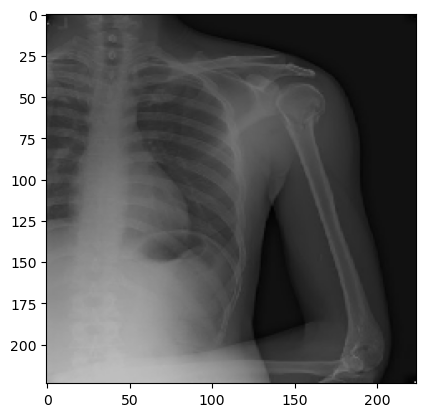

In [173]:
img = load_img('D:\STUDY\\4th year\\Graduation Project\\AI\\Datasets\\used\\FracAtlas\\images\\Test\\Fractured\\IMG0000758.jpg',target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 154ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 132ms/step
x-ray detected!
->Anatomical recognition...
1/1 [==============================] - 0s 130ms/step
Nick x-ray body part x-ray detected!
-> Bone fracture detection...
1/1 [==============================] - 0s 143ms/step
Fracture bone detected!
-> Fracture type detection...
1/1 [==============================] - 0s 76ms/step
Spiral Fracture
________________________________________
Overview
What is a spiral fracture?
Spiral fractures are a type of broken bone. They happen when one of your bones is broken with a twisting motion. They create a fracture line that wraps around your bone and looks like a corkscrew. You might see spiral fractures referred to as complete fractures. This means the line of the break goes all the way through your bone.

Spiral fractures usually affect long bones in your body. Some o

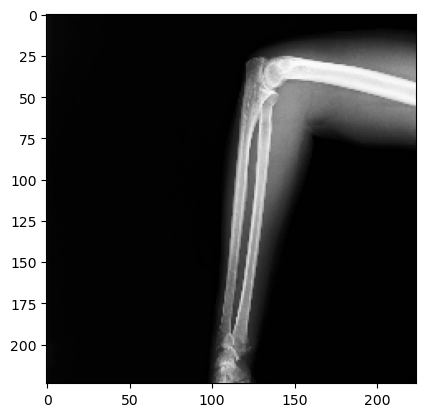

In [174]:
img = load_img('D:\STUDY\\4th year\\Graduation Project\\AI\\Datasets\\used\\FracAtlas\\images\\Test\\Fractured\\IMG0000025.jpg',target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 143ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 134ms/step
x-ray detected!
->Anatomical recognition...
1/1 [==============================] - 0s 122ms/step
Nick x-ray body part x-ray detected!
-> Bone fracture detection...
1/1 [==============================] - 0s 132ms/step
Normal unfractured bones


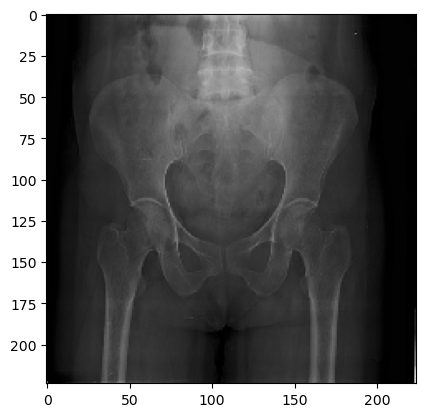

In [175]:
img = load_img('D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\FracAtlas\\images\\Test\\Non_fractured\\IMG0000340.jpg',target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 145ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 163ms/step
MRI detected!
1/1 [==============================] - 0s 119ms/step
Breast MRI detected!
-> Breast Cancer detection...
1/1 [==============================] - 0s 137ms/step
Breast Cancer detected!
-> Cancer type detection...
1/1 [==============================] - 0s 144ms/step
Malignant breast cancer detected!
________________________________________
Overview
Breast cancer is a disease in which abnormal breast cells grow out of control and form tumours. If left unchecked, the tumours can spread throughout the body and become fatal.

Breast cancer cells begin inside the milk ducts and/or the milk-producing lobules of the breast. The earliest form (in situ) is not life-threatening and can be detected in early stages. Cancer cells can spread into nearby breast tissue (invasion). This creates tumours that c

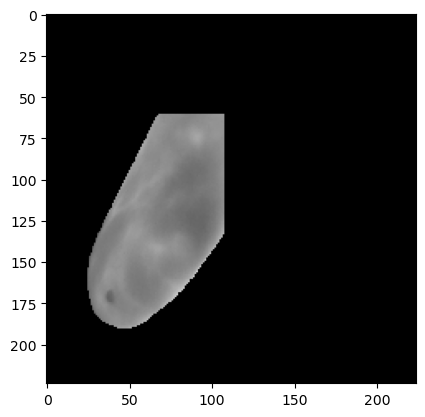

In [176]:
img = load_img('D:\STUDY\\4th year\\Graduation Project\\AI\Datasets\\used\\breast cancer type\\breast-cancer-dataset\\Train\\Malignant\\PAC_46_DN0-dir.png',target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 142ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 143ms/step
MRI detected!
1/1 [==============================] - 0s 185ms/step
Breast MRI detected!
-> Breast Cancer detection...
1/1 [==============================] - 0s 161ms/step
Breast Cancer detected!
-> Cancer type detection...
1/1 [==============================] - 0s 146ms/step
Benign breast cancer detected!
________________________________________
Overview
Breast cancer is a disease in which abnormal breast cells grow out of control and form tumours. If left unchecked, the tumours can spread throughout the body and become fatal.

Breast cancer cells begin inside the milk ducts and/or the milk-producing lobules of the breast. The earliest form (in situ) is not life-threatening and can be detected in early stages. Cancer cells can spread into nearby breast tissue (invasion). This creates tumours that caus

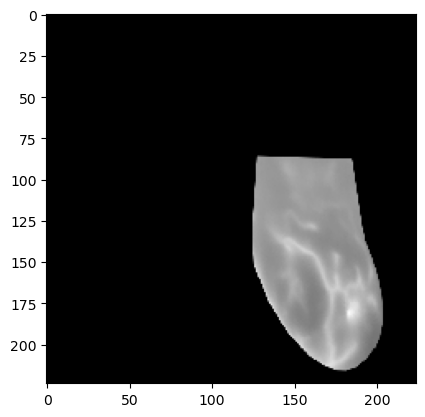

In [177]:
img = load_img("D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\\breast cancer type\\breast-cancer-dataset\Test\Benign\PAC_64_DN7-esq.png",target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 144ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 137ms/step
x-ray detected!
->Anatomical recognition...
1/1 [==============================] - 0s 124ms/step
Chest x-ray detected!
->Covid detection...
1/1 [==============================] - 0s 141ms/step
Covid_19 detected!
________________________________________
Overview
Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.

Most people infected with the virus will experience mild to moderate respiratory illness and recover without requiring special treatment. However, some will become seriously ill and require medical attention. Older people and those with underlying medical conditions like cardiovascular disease, diabetes, chronic respiratory disease, or cancer are more likely to develop serious illness. Anyone can get sick with COVID-19 and become seriously ill or die at any

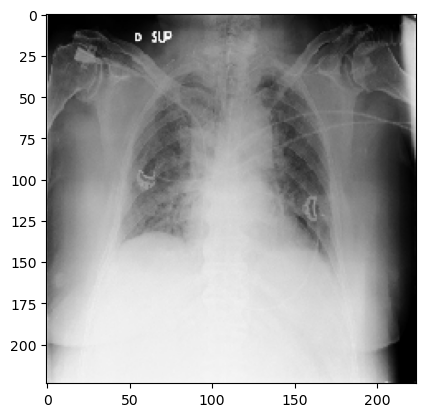

In [178]:
img = load_img('D:\STUDY\\4th year\\Graduation Project\\AI\\Datasets\\used\\Covid_Pneumonia_Normal\\Test\COVID\\COVID_100.png',target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 138ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 132ms/step
x-ray detected!
->Anatomical recognition...
1/1 [==============================] - 0s 126ms/step
Chest x-ray detected!
->Covid detection...
1/1 [==============================] - 0s 123ms/step
Normal Healthy chest x-ray


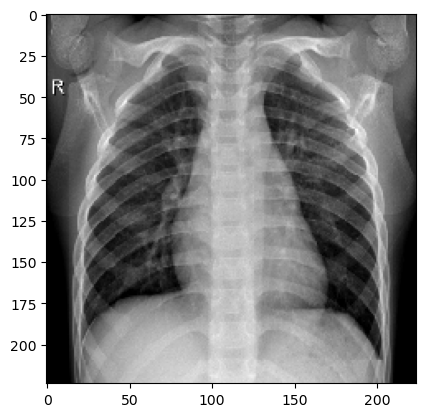

In [179]:
img = load_img('D:\STUDY\\4th year\\Graduation Project\\AI\\Datasets\\used\\Covid_Pneumonia_Normal\\Test\\NORMAL\\NORMAL_1009.png',target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 151ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 138ms/step
x-ray detected!
->Anatomical recognition...
1/1 [==============================] - 0s 129ms/step
Chest x-ray detected!
->Covid detection...
1/1 [==============================] - 0s 124ms/step
Pneumonia on chest detected!
________________________________________
Overview
What is pneumonia?
Pneumonia is an infection in your lungs caused by bacteria, viruses or fungi. Pneumonia causes your lung tissue to swell (inflammation) and can cause fluid or pus in your lungs. Bacterial pneumonia is usually more severe than viral pneumonia, which often resolves on its own.

Pneumonia can affect one or both lungs. Pneumonia in both of your lungs is called bilateral or double pneumonia.

Symptoms and Causes
What are the signs and symptoms of pneumonia?
Symptoms of pneumonia depend on the cause. Symptoms can range fr

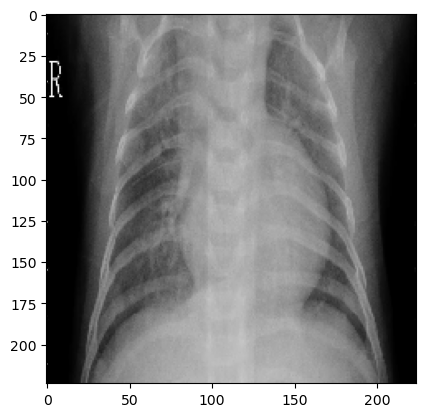

In [180]:
img = load_img('D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\Covid_Pneumonia_Normal\Test\PNEUMONIA\\PNEUMONIA_1028.png',target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 138ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 130ms/step
MRI detected!
1/1 [==============================] - 0s 145ms/step
Brain MRI detected!
-> Tumors detection...
1/1 [==============================] - 0s 126ms/step
Brain tumor detected!
-> Tumor type detection...
1/1 [==============================] - 0s 149ms/step
pituitary_tumor type detected!
________________________________________
Overview
Pituitary tumors are unusual growths that develop in the pituitary gland. This gland is an organ about the size of a pea. It's located behind the nose at the base of the brain. Some of these tumors cause the pituitary gland to make too much of certain hormones that control important body functions. Others can cause the pituitary gland to make too little of those hormones.

Most pituitary tumors are benign. That means they are not cancer. Another name for these n

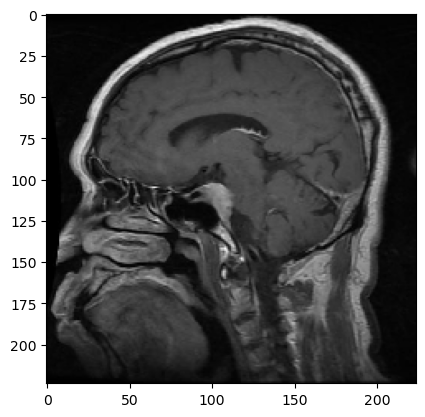

In [181]:
img = load_img('D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\Brain Tumor or no me\Test\\tumor\\image(1).jpg',target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 143ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 142ms/step
MRI detected!
1/1 [==============================] - 0s 128ms/step
Brain MRI detected!
-> Tumors detection...
1/1 [==============================] - 0s 130ms/step
No tumor found


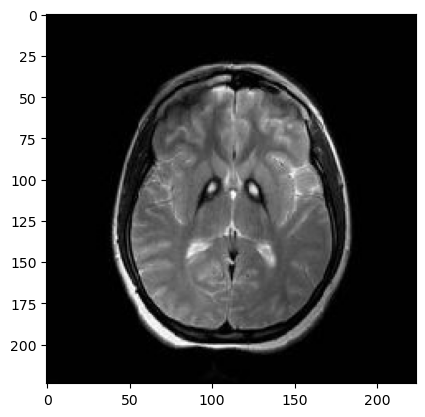

In [182]:
img = load_img('D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\Brain Tumor or no me\Test\\no_tumor\\image(8).jpg',target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 142ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 127ms/step
MRI detected!
1/1 [==============================] - 0s 129ms/step
Brain MRI detected!
-> Tumors detection...
1/1 [==============================] - 0s 142ms/step
Brain tumor detected!
-> Tumor type detection...
1/1 [==============================] - 0s 157ms/step
glioma_tumor type detected!
________________________________________
Overview
What is a glioma?
Glioma is a common type of tumor originating in the brain. About 33 percent of all brain tumors are gliomas, which originate in the glial cells that surround and support neurons in the brain, including astrocytes, oligodendrocytes and ependymal cells.

Gliomas are called intra-axial brain tumors because they grow within the substance of the brain and often mix with normal brain tissue.

What are the symptoms of glioma?
Gliomas cause symptoms by pr

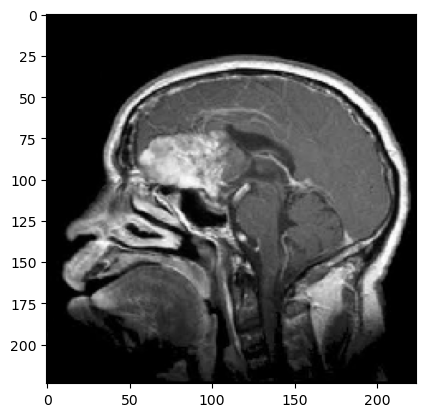

In [183]:
img = load_img("D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\\brain_tumor classification\Data\Test\glioma_tumor\G_1.jpg",target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 149ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 140ms/step
MRI detected!
1/1 [==============================] - 0s 137ms/step
Brain MRI detected!
-> Tumors detection...
1/1 [==============================] - 0s 190ms/step
Brain tumor detected!
-> Tumor type detection...
1/1 [==============================] - 0s 159ms/step
meningioma_tumor type detected!
________________________________________
Overview
What Is Meningioma?
A meningioma is a tumor that arises from the meninges — the membranes that surround your brain and spinal cord. Although not technically a brain tumor, it is included in this category because it may compress or squeeze the adjacent brain, nerves and vessels. Meningioma is the most common type of tumor that forms in the head.

Most meningiomas grow very slowly, often over many years without causing symptoms. But in some instances, their effec

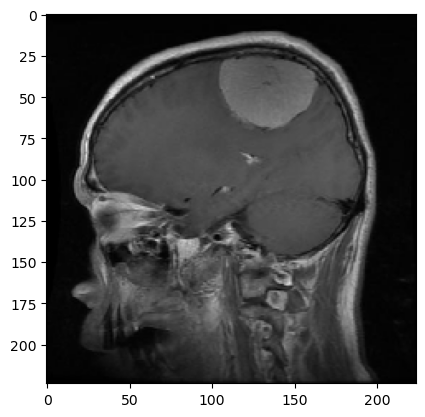

In [184]:
img = load_img("D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\\brain_tumor classification\Data\Test\meningioma_tumor\M_589.jpg",target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 148ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 158ms/step
MRI detected!
1/1 [==============================] - 0s 137ms/step
Brain MRI detected!
-> Tumors detection...
1/1 [==============================] - 0s 162ms/step
Brain tumor detected!
-> Tumor type detection...
1/1 [==============================] - 0s 145ms/step
pituitary_tumor type detected!
________________________________________
Overview
Pituitary tumors are unusual growths that develop in the pituitary gland. This gland is an organ about the size of a pea. It's located behind the nose at the base of the brain. Some of these tumors cause the pituitary gland to make too much of certain hormones that control important body functions. Others can cause the pituitary gland to make too little of those hormones.

Most pituitary tumors are benign. That means they are not cancer. Another name for these n

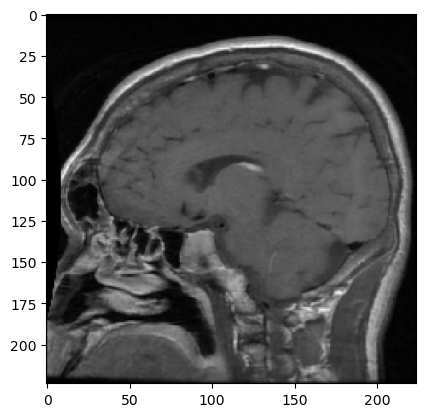

In [185]:
img = load_img("D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\\brain_tumor classification\Data\Test\pituitary_tumor\P_9.jpg",target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 141ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 135ms/step
MRI detected!
1/1 [==============================] - 0s 130ms/step
Brain MRI detected!
-> Tumors detection...
1/1 [==============================] - 0s 128ms/step
Brain tumor detected!
-> Tumor type detection...
1/1 [==============================] - 0s 157ms/step
normal no_tumor type detected!


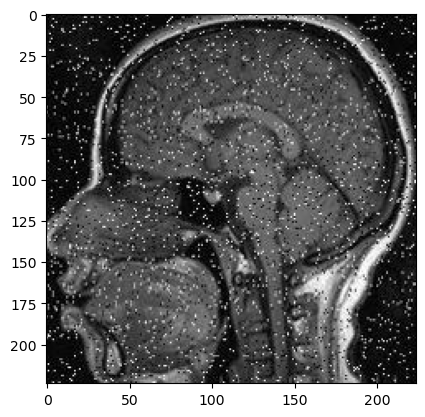

In [186]:
img = load_img("D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\\brain_tumor classification\Data\Test\\normal\\N_64_SP_.jpg",target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 142ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 144ms/step
CT Scan detected!
-> Diagnosis detection...
1/1 [==============================] - 0s 144ms/step
Cyst detected!
________________________________________
Overview
A cyst is an abnormal pocket of fluid, like a blister, that can form in many different areas of the body including the skin, genitals and internal organs. A cyst can vary in size from a tiny sac right up to a heavy bag containing litres of fluid. The common symptom is swelling around the area, but a cyst may or may not be painful. Sometimes, depending on the cause and location, a cyst contains semi-solid or solid material.

The typical treatment for any cyst is removal by surgery and a routine test for cancer, even though most cysts are benign. All unusual lumps need to be investigated by a qualified health professional.

Causes of cysts
Most

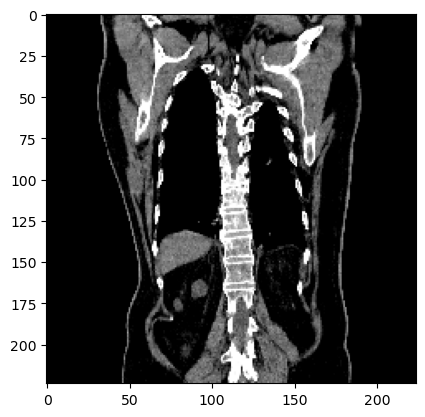

In [187]:
img = load_img("D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\CT\Cyst- (1).jpg",target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 149ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 175ms/step
CT Scan detected!
-> Diagnosis detection...
1/1 [==============================] - 0s 180ms/step
Stone detected!
________________________________________
Overview
Stone disease occurs when chemicals in your urine become concentrated and form crystals in your urinary tract. It most often affects your kidneys, though it can also affect your bladder, the tubes that carry urine from your kidneys to your bladder (ureters), or the tube that connects your bladder to the outside of your body (urethra).

When these crystals – or stones – get stuck in any part of your urinary tract, they can cause severe pain, blockage and infection. Men are more likely to develop them than women, though lots of other factors can increase your risk, including dehydration, obesity and a family history of stone disease.

Symptoms

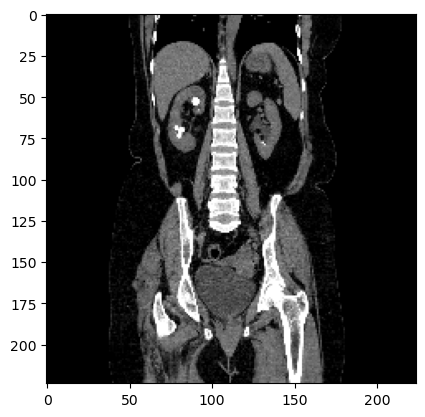

In [188]:
img = load_img("D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\CT\Stone- (100).jpg",target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 149ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 149ms/step
CT Scan detected!
-> Diagnosis detection...
1/1 [==============================] - 0s 149ms/step
Normal detected!


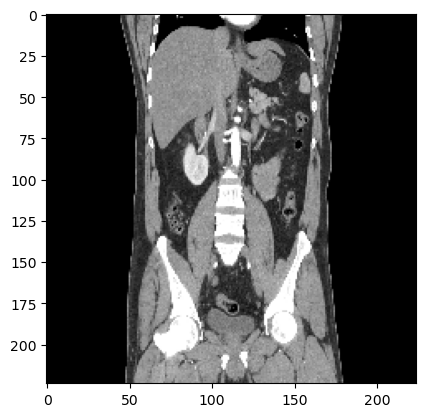

In [189]:
img = load_img("D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\CT\\Normal- (1001).jpg",target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 142ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 140ms/step
CT Scan detected!
-> Diagnosis detection...
1/1 [==============================] - 0s 128ms/step
Tumor detected!
________________________________________
Overview
What is a tumor?
A tumor is a mass or group of abnormal cells that form in the body. If you have a tumor, it isn’t necessarily cancer. Many tumors are benign (not cancerous).

Tumors can form throughout the body. They can affect bone, skin, tissues, glands and organs. Neoplasm is another word for tumor.

What’s the difference between a tumor and a cyst?
A tumor is a solid mass of tissue. It may or may not be cancerous.

A cyst is a small sac that may contain fluid, air or solid material. The majority of cysts are not cancerous.

Symptoms and Causes
What causes a tumor?
Your body is constantly making new cells to replace old or damaged ones t

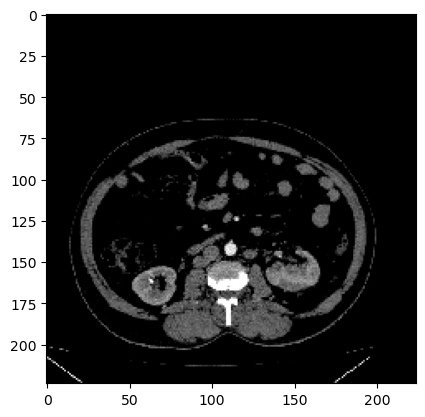

In [190]:
img = load_img("D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\CT\Tumor- (1005).jpg",target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 175ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 143ms/step
OCT Scan detected!
-> Diseases detection...
1/1 [==============================] - 0s 79ms/step
CNV: Choroidal Neovascularization eyes detected!
________________________________________
Overview
Some patients with dry age-related macular degeneration (AMD) eventually develop “wet AMD,” in which abnormal blood vessels grow into the retina and leak fluid, making the retina “wet.” Technically, this is called CNV or choroidal (core-oyd-al) neovascularization (nee-oh-vas-kyoo-lar-eye-zay-shun).
What Does Choroidal Neovascularization Mean?
“Neovascularization” means “new blood vessels.” These new, abnormal blood vessels originate in the choroid, a vessel-containing layer under the retina. When the retinas of people with AMD produce too much vascular endothelial growth factor (VEGF), new blood vessels sprout

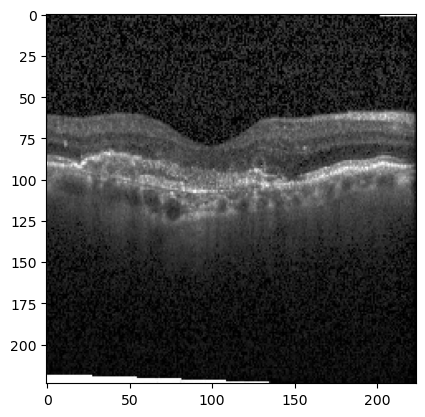

In [191]:
img = load_img("D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\OCT\CNV-1016042-1.jpeg",target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 151ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 144ms/step
OCT Scan detected!
-> Diseases detection...
1/1 [==============================] - 0s 89ms/step
DME: Diabetic Macular Edema eyes detected!
________________________________________
Overview
What is Diabetic Macular Edema (DME)?
Diabetes is the leading cause of new blindness in the United States, with DME contributing greatly to this vision loss. DME may affect up to 10% of people with diabetes. DME is a complication of diabetes caused by fluid accumulation in the macula that can affect the fovea. The macula is the central portion in the retina which is in the back of the eye and where vision is the sharpest.Vision loss from DME can progress over a period of months and make it impossible to focus clearly.

What Causes DME?
DME is an eye condition which can occur in people living with diabetes – both typ

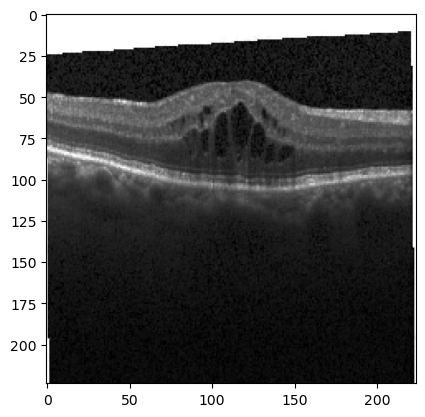

In [192]:
img = load_img("D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\OCT\DME-1081406-1.jpeg",target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 157ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 145ms/step
OCT Scan detected!
-> Diseases detection...
1/1 [==============================] - 0s 64ms/step
Drusen eyes detected!
________________________________________
Overview
Drusen are yellow deposits under the retina. Drusen are made up of lipids and proteins. Drusen can be different sizes—small, medium, and large. Small drusen are common in those 50 and older without age-related macular degeneration (AMD). But having many small drusen and larger drusen are often signs of AMD.

There are other drusen found in the optic nerve, which usually do not affect vision.

What Causes Drusen?
Drusen occur naturally with age. The exact relationship between degenerative macular disease and drusen is not clear. However, having large drusen is a sign of AMD.

Drusen of the Optic Nerve
Drusen can also occur in the optic n

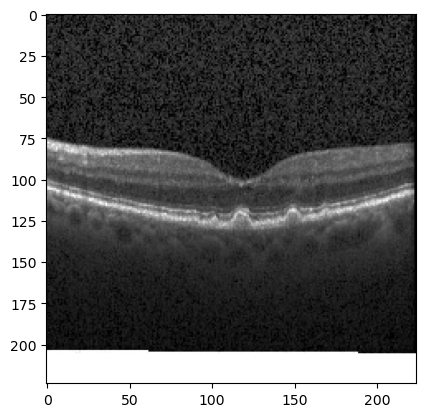

In [193]:
img = load_img("D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\OCT\DRUSEN-1083159-1.jpeg",target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 140ms/step
Medical Imaging image detected!
-> Scan type detection...
1/1 [==============================] - 0s 141ms/step
OCT Scan detected!
-> Diseases detection...
1/1 [==============================] - 0s 66ms/step
Normal eyes detected!


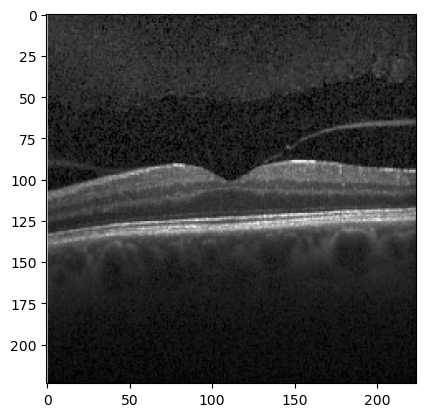

In [194]:
img = load_img("D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\OCT\\NORMAL-1017237-1.jpeg",target_size=(224,224))
plt.imshow(img)
detect(img)

### Food Samples

-> image recognition...
1/1 [==============================] - 0s 141ms/step
Food image detected!
-> Calories detection...
1/1 [==============================] - 0s 77ms/step
Chocolate Cake: ~4 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


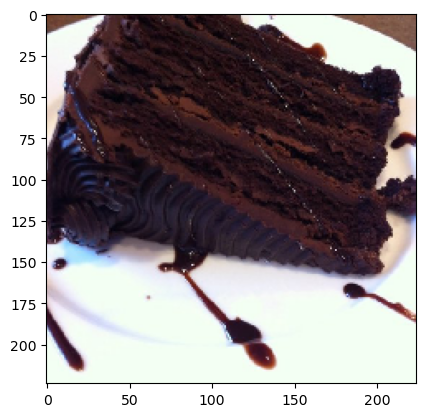

In [195]:
img = load_img('D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\Food 101\\chocklate cake.jpg',target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 145ms/step
Food image detected!
-> Calories detection...
1/1 [==============================] - 0s 81ms/step
Donuts: ~4 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


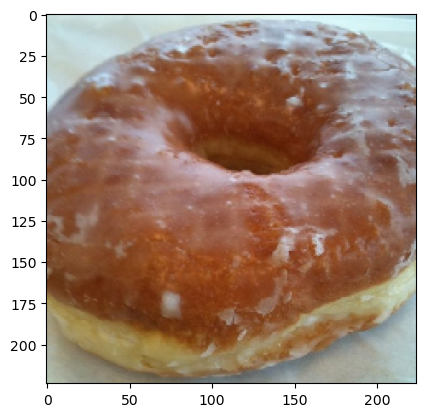

In [196]:
img = load_img("D:\STUDY\\4th year\Graduation Project\\AI\\Datasets\\used\\Food 101\\439850.jpg",target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 145ms/step
Food image detected!
-> Calories detection...
1/1 [==============================] - 0s 66ms/step
Falafel: ~2 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


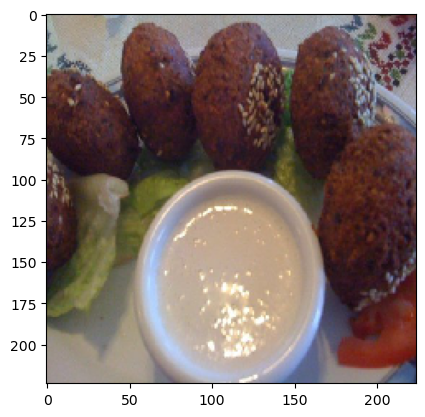

In [197]:
img = load_img('D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\Food 101\\falafel.jpg',target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 147ms/step
Food image detected!
-> Calories detection...
1/1 [==============================] - 0s 63ms/step
French Fries: ~3.5 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


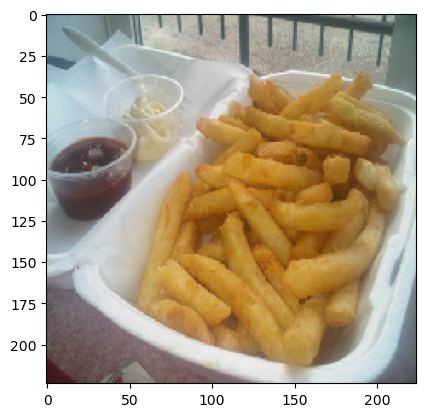

In [198]:
img = load_img('D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\Food 101\\frensh fries.jpg',target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 150ms/step
Food image detected!
-> Calories detection...
1/1 [==============================] - 0s 85ms/step
French Toast: ~2 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


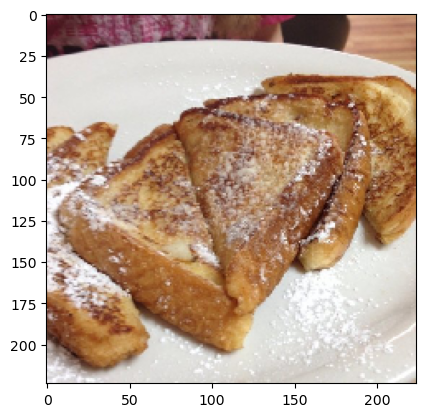

In [199]:
img = load_img('D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\Food 101\\frensh toast.jpg',target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 149ms/step
Food image detected!
-> Calories detection...
1/1 [==============================] - 0s 69ms/step
Hot Dog: ~3.5 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


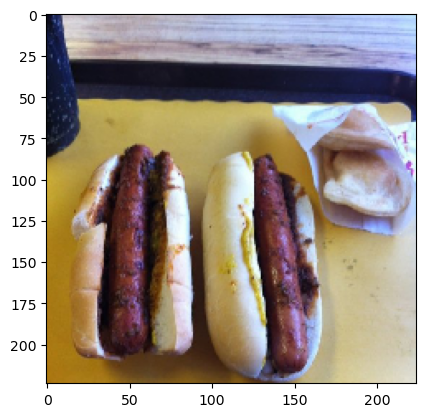

In [200]:
img = load_img('D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\Food 101\\hot dog.jpg',target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 145ms/step
Food image detected!
-> Calories detection...
1/1 [==============================] - 0s 64ms/step
Ice Cream: ~2 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


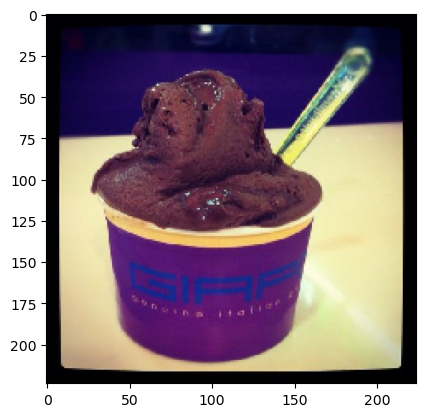

In [201]:
img = load_img("D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\Food 101\ice_cream.jpg",target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 134ms/step
Food image detected!
-> Calories detection...
1/1 [==============================] - 0s 73ms/step
Pizza: ~2.5 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


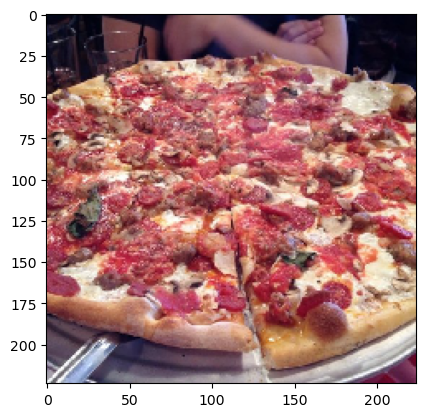

In [202]:
img = load_img('D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\Food 101\\pizza.jpg',target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 2s 2s/step
Food image detected!
-> Calories detection...
1/1 [==============================] - 2s 2s/step
Sushi: ~1 calorie per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


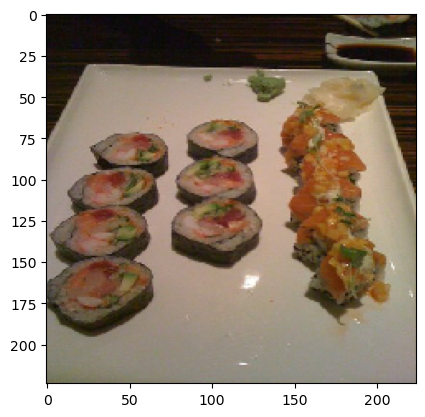

In [12]:
img = load_img('D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\Food 101\\sushi.jpg',target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 162ms/step
ERROR: Unsupported image object!
Please try to enter a valid 'Medical imaging' or 'food' image


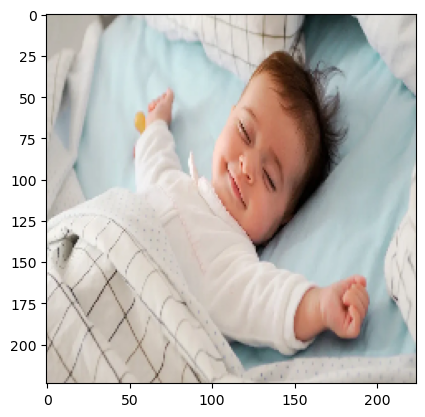

In [18]:
img = load_img("D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\\test random images\Baby_Sleeping_Blanket_1296x728-header-1296x728.webp",target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 169ms/step
ERROR: Unsupported image object!
Please try to enter a valid 'Medical imaging' or 'food' image


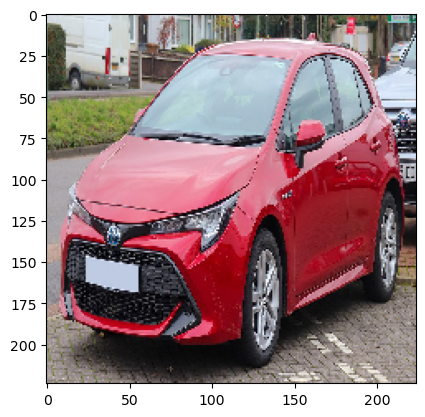

In [19]:
img = load_img("D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\\test random images\car.jpg",target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 153ms/step
ERROR: Unsupported image object!
Please try to enter a valid 'Medical imaging' or 'food' image


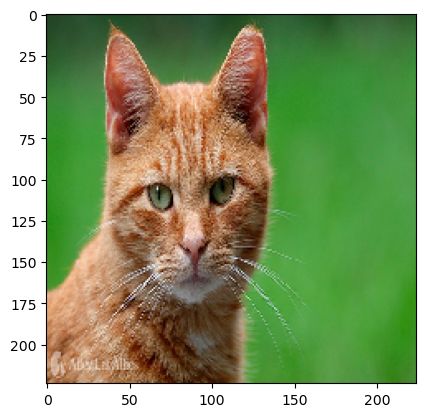

In [20]:
img = load_img("D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\\test random images\FELV-cat.jpg",target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 174ms/step
ERROR: Unsupported image object!
Please try to enter a valid 'Medical imaging' or 'food' image


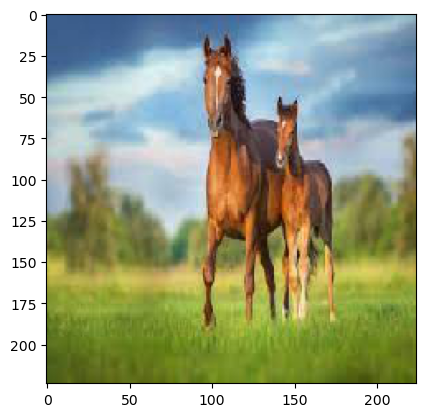

In [21]:
img = load_img("D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\\test random images\images.jpeg",target_size=(224,224))
plt.imshow(img)
detect(img)

-> image recognition...
1/1 [==============================] - 0s 186ms/step
ERROR: Unsupported image object!
Please try to enter a valid 'Medical imaging' or 'food' image


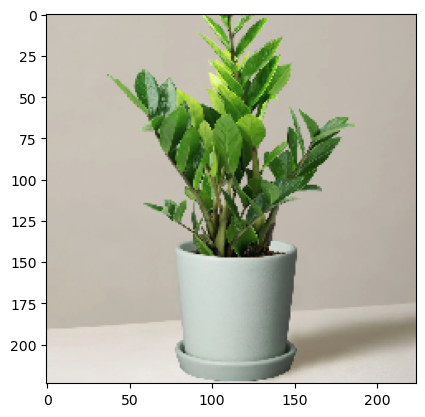

In [22]:
img = load_img("D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\\test random images\\1660073901-best-indoor-plants-zz-plant-1660073875.png",target_size=(224,224))
plt.imshow(img)
detect(img)

---

# **Chatbot**

In [4]:
diseases = ['Influenza (Flu)', 'Tuberculosis (TB)', 'HIV/AIDS', 'Malaria',
       'COVID-19.', 'Hepatitis', 'Cholera', 'Ebola Virus Disease',
       'Dengue Fever', 'Coronary Artery Disease (CAD)',
       'Hypertension (High Blood Pressure)',
       'Heart Attack (Myocardial Infarction)', 'Stroke',
       'Arrhythmias (Irregular Heartbeat)', 'Atherosclerosis',
       'Breast Cancer', 'Lung Cancer', 'Prostate Cancer',
       'Colorectal Cancer', 'Skin Cancer (Melanoma)', 'Brain Cancer',
       'Asthma', 'Leukemia', 'Chronic Obstructive ',
       'Pulmonary Disease (COPD)', 'Interstitial Lung Disease',
       'Diabetes', 'Hypothyroidism (Underactive Thyroid)',
       'Hyperthyroidism (Overactive Thyroid)', "Addison's Disease"]

labels = ["Addison's Disease", 'Arrhythmias (Irregular Heartbeat)', 'Asthma', 'Atherosclerosis', 
          'Brain Cancer', 'Breast Cancer', 'COVID-19.', 'Cholera', 'Chronic Obstructive ', 'Colorectal Cancer', 
          'Coronary Artery Disease (CAD)', 'Dengue Fever', 'Diabetes', 'Ebola Virus Disease', 'HIV/AIDS', 
          'Heart Attack (Myocardial Infarction)', 'Hepatitis', 'Hypertension (High Blood Pressure)', 
          'Hyperthyroidism (Overactive Thyroid)', 'Hypothyroidism (Underactive Thyroid)', 'Influenza (Flu)', 
          'Interstitial Lung Disease', 'Leukemia', 'Lung Cancer', 'Malaria', 'Prostate Cancer', 
          'Pulmonary Disease (COPD)', 'Skin Cancer (Melanoma)', 'Stroke', 'Tuberculosis (TB)', 'about', 
          'creation', 'death', 'goodbye', 'greeting', 'happy', 'help', 'no-response', 'sad', 'scared', 'skill', 'swear', 'thanks', 'understand']

responses = {'greeting': ['Hello there. Tell me how are you feeling today?',
  'Hi there. What brings you here today?',
  'Hi there. How are you feeling today?',
  'Great to see you. How do you feel currently?',
  "Hello there. Glad to see you. What's going on in your world right now?",
  "Good morning. I hope you had a good night's sleep. How are you feeling today? ",
  'Hello, i am Caroline, your smart doctor bot. How can i help you?'],
 'goodbye': ['See you later.',
  'Have a nice day.',
  'Bye! Come back again.',
  "I'll see you soon.",
  'Sad to see you go :(',
  'Talk to you later',
  'Goodbye!',
  'Come back soon'],
 'thanks': ['Happy to help!',
  'Any time!',
  'My pleasure',
  "You're most welcome!",
  'Glad to help',
  'The pleasure is mine',
  'I am here to help',
  'Thank you for being here',
  'No worries'],
 'no-response': ["Sorry, I didn't understand you!",
  'Not sure I understand that!',
  "Please don't hesitate to talk to me!",
  "Execuseme, I don't get it!"],
 'about': ["I'm Caroline, your Personal Doctor AI Assistant. How are you feeling today",
  "I'm Caroline, a Doctor AI Assitant designed to assist you. Tell me about yourself.",
  "I'm Caroline. I am a conversational agent designed to mimic a doctor. So how are you feeling today?",
  'You can call me Caroline.',
  "I'm Caroline!",
  'Call me Caroline'],
 'swear': ['please use appropriate language',
  'Maintaining decency would be appreciated'],
 'skill': ['I a am Caroline, your smart doctor bot, i can help you for diagnosis your symptoms and recommend you the needed tests, and orientate you to book an appoinment in a laboratory, clinic or to purchase a prescription\nI am here to help you.'],
 'creation': ['I was created by Eng. Abdallah Fekry',
  'I was trained on a text dataset using Deep Learning & Natural Language Processing techniques by Eng. Abdallah Fekry'],
 'help': ['Sure. Tell me how you feel?',
  'Tell me your problem so that i can assist you, what you feel?',
  'Yes, How can I help you, what you feel?'],
 'sad': ["I'm sorry to hear that. I'm here for you. Talking about it might help. So, tell me why do you think you're feeling this way?",
  "I'm here for you. Could you tell me why you're feeling this way?",
  'Why do you think you feel this way?',
  'What do you think is causing this?',
  'Take a deep breath and gather your thoughts. Go take a walk if possible. Stay hydrated',
  'Give yourself a break. Go easy on yourself.',
  'I am sorry to hear that. What is the reason behind this?'],
 'happy': ["That's great to hear. I'm glad you're feeling this way.",
  "Oh i see. That's great.",
  'Great, I am happy for seeing that'],
 'scared': ["It's only natural to feel this way. I'm here for you.",
  "It'll all be okay. This feeling is only momentary.",
  "I understand how you feel. Don't put yourself down because of it."],
 'death': ["I'm sorry to hear that. If you want to talk about it. I'm here.",
  'I am really sorry to hear that. I am here to help you with grief, anxiety and anything else you may feel at this time.',
  "My condolences. I'm here if you need to talk."],
 'understand': ["It sound like i'm not being very helpful right now.",
  "I'm sorry to hear that. I'm doing my best to help",
  "I'm trying my best to help you. So please talk to me",
  "I'm sorry if i offended you in anyway. I'm only here to help",
  'Forgive me if i did anything to offend you. I only want to help'],
 'Influenza (Flu)': ['There is a suspection that you have Influenza (Flu)!,\nyou need to make Complete Blood Count (CBC),C-Reactive Protein (CRP),Procalcitonin,Influenza Antibody Testing to be sure.'],
 'Tuberculosis (TB)': ['There is a suspection that you have Tuberculosis (TB)!,\nyou need to make Tuberculin Skin Test (TST) or Mantoux Test,Interferon-Gamma Release Assays (IGRAs),Complete Blood Count (CBC),Erythrocyte Sedimentation Rate (ESR),C-Reactive Protein (CRP) Test,Liver Function Tests (LFTs),HIV Test to be sure.'],
 'HIV/AIDS': ['There is a suspection that you have HIV/AIDS!,\nyou need to make HIV Antibody Test (ELISA/Western Blot),CD4 Count,Viral Load Test,CD4/CD8 Ratio,Resistance Testing,Complete Blood Count (CBC),Liver Function Tests,Kidney Function Tests,Hepatitis Tests,STD Tests,Cytomegalovirus (CMV) Test to be sure.'],
 'Malaria': ['There is a suspection that you have Malaria!,\nyou need to make Malaria Smear (Blood Film),Rapid Diagnostic Tests (RDTs),Polymerase Chain Reaction (PCR),Quantitative Buffy Coat (QBC) Test,Serology Tests,Complete Blood Count (CBC) to be sure.'],
 'COVID-19.': ['There is a suspection that you have COVID-19.!,\nyou need to make Antibody (Serology) Tests,Antigen Tests,CRP (C-Reactive Protein) Test,D-Dimer Test,Complete Blood Count (CBC),Ferritin Test,Differential White Blood Cell Count to be sure.'],
 'Hepatitis': ['There is a suspection that you have Hepatitis!,\nyou need to make Hepatitis Panel,Hepatitis A Antibody Tests,Hepatitis B Surface Antigen (HBsAg) Test,Hepatitis B Core Antibody (anti-HBc) Test,Hepatitis B Surface Antibody (anti-HBs) Test,Hepatitis B DNA Test,Hepatitis C Antibody Test,Hepatitis C RNA Test,Hepatitis C Antibody Test,Hepatitis C RNA Test,Liver Function Tests,Bilirubin Test,Albumin and Prothrombin Time (PT) Tests,Liver Biopsy or Imaging to be sure.'],
 'Cholera': ['There is a suspection that you have Cholera!,\nyou need to make Stool Culture,PCR (Polymerase Chain Reaction),Rapid Antigen Test to be sure.'],
 'Ebola Virus Disease': ['There is a suspection that you have Ebola Virus Disease!,\nyou need to make Polymerase Chain Reaction (PCR) Test,Reverse Transcription PCR (RT-PCR),Enzyme-Linked Immunosorbent Assay (ELISA),Rapid Diagnostic Tests (RDTs),Serology Tests,Viral Culture,Real-time PCR (RT-PCR),Next-Generation Sequencing (NGS),Lateral Flow Assays to be sure.'],
 'Dengue Fever': ['There is a suspection that you have Dengue Fever!,\nyou need to make Complete Blood Count (CBC),NS1 Antigen Test,IgM Antibody Test,IgG Antibody Test,PCR (Polymerase Chain Reaction) Test,Platelet Count,Liver Function Tests,Serology Tests to be sure.'],
 'Coronary Artery Disease (CAD)': ['There is a suspection that you have Coronary Artery Disease (CAD)!,\nyou need to make Cholesterol Panel,High-Sensitivity C-Reactive Protein (hs-CRP),Troponin,Brain Natriuretic Peptide (BNP) or N-Terminal Pro B-Type Natriuretic Peptide (NT-proBNP),Homocysteine,Fasting Blood Sugar (Glucose),Complete Blood Count (CBC),Lipoprotein(a) to be sure.'],
 'Hypertension (High Blood Pressure)': ['There is a suspection that you have Hypertension (High Blood Pressure)!,\nyou need to make Blood Glucose Test,Lipid Profile,Kidney Function Tests,Potassium and Sodium Levels,Thyroid Function Tests,C-reactive Protein (CRP),Hemoglobin A1c (HbA1c),Renal Function Panel,Urine Tests,Electrocardiogram (ECG or EKG) to be sure.'],
 'Heart Attack (Myocardial Infarction)': ['There is a suspection that you have Heart Attack (Myocardial Infarction)!,\nyou need to make ECG,Cardiac Troponin,Creatine Kinase-MB (CK-MB),Myoglobin,C-Reactive Protein (CRP),Complete Blood Count (CBC),Lipid Profile,Natriuretic Peptides to be sure.'],
 'Stroke': ['There is a suspection that you have Stroke!,\nyou need to make Complete Blood Count (CBC),Blood Glucose Test,Lipid Profile,Coagulation Studies,Cardiac Biomarkers,Inflammatory Markers,Toxicology Screen,Hemoglobin A1c (HbA1c) to be sure.'],
 'Arrhythmias (Irregular Heartbeat)': ['There is a suspection that you have Arrhythmias (Irregular Heartbeat)!,\nyou need to make Electrocardiogram (ECG or EKG),Holter Monitor,Event Monitor,Stress Test,Echocardiogram,Electrophysiological (EP) Study,Cardiac MRI,Blood Tests,Tilt Table Test,Implantable Loop Recorder (ILR),Signal-Averaged ECG,CT Scan or Coronary Angiography,Genetic Testing to be sure.'],
 'Atherosclerosis': ['There is a suspection that you have Atherosclerosis!,\nyou need to make Lipid Profile,High-Density Lipoprotein (HDL) Cholesterol,C-Reactive Protein (CRP),Homocysteine,Fasting Blood Glucose,Lipoprotein(a) (Lp(a)),Apolipoprotein B (ApoB) to be sure.'],
 'Breast Cancer': ['There is a suspection that you have Breast Cancer!,\nyou need to make Breast Self-Examination (BSE),Clinical Breast Examination (CBE),Mammography,Breast Ultrasound,Breast Magnetic Resonance Imaging (MRI),Biopsy,Ductal Lavage or Ductal Endoscopy,Genetic Testing,Breast Cancer Biomarker Tests,Sentinel Lymph Node Biopsy,Positron Emission Tomography (PET) Scan to be sure.'],
 'Lung Cancer': ['There is a suspection that you have Lung Cancer!,\nyou need to make Chest X-ray,CT Scan,Sputum Cytology,Bronchoscopy,Needle Biopsy,Mediastinoscopy,PET Scan,MRI,Bone Scan,Blood Tests,Pulmonary Function Tests,Genetic Testing to be sure.'],
 'Prostate Cancer': ['There is a suspection that you have Prostate Cancer!,\nyou need to make Prostate-Specific Antigen (PSA) Test,Digital Rectal Exam (DRE),Transrectal Ultrasound (TRUS),Prostate Biopsy,Multiparametric Magnetic Resonance Imaging (mpMRI),Urine Tests,Bone Scan,CT Scan,MRI,CT Urography,Pelvic Lymph Node Dissection,Genomic Tests to be sure.'],
 'Colorectal Cancer': ['There is a suspection that you have Colorectal Cancer!,\nyou need to make Colonoscopy,Flexible Sigmoidoscopy,Fecal Occult Blood Test (FOBT),Fecal Immunochemical Test (FIT),Stool DNA Test,Virtual Colonoscopy (CT Colonography),Double-Contrast Barium Enema,Biopsy,carcinoembryonic antigen (CEA),Genetic Testing to be sure.'],
 'Skin Cancer (Melanoma)': ['There is a suspection that you have Skin Cancer (Melanoma)!,\nyou need to make Skin Examination,Dermatoscopy,Biopsy,Confocal Microscopy,Sentinel Lymph Node Biopsy,Blood Tests,Imaging Tests to be sure.'],
 'Brain Cancer': ['There is a suspection that you have Brain Cancer!,\nyou need to make Medical History and Physical Examination,Neurological Examination,MRI (Magnetic Resonance Imaging),CT (Computed Tomography) Scan,Biopsy,Cerebral Angiography,Lumbar Puncture (Spinal Tap),PET (Positron Emission Tomography) Scan,SPECT (Single Photon Emission Computed Tomography) Sca,Functional MRI (fMRI),EEG (Electroencephalogram),Tumor Marker Tests to be sure.'],
 'Asthma': ['There is a suspection that you have Asthma!,\nyou need to make Spirometry,Peak Expiratory Flow (PEF) Test,Chest X-Ray,Allergy Testing,Fractional Exhaled Nitric Oxide (FeNO) Test,Methacholine Challenge Test,CT Scan of the Lungs,Blood Tests,Sputum Eosinophil Test,Bronchial Provocation Test to be sure.'],
 'Leukemia': ['There is a suspection that you have Leukemia!,\nyou need to make Complete Blood Count (CBC),Peripheral Blood Smear,Bone Marrow Aspiration and Biopsy,Cytogenetic Analysis,Flow Cytometry,Molecular Testing,Immunohistochemistry,Lumbar Puncture (Spinal Tap),Imaging Tests,Biopsy of Lymph Nodes or Other Tissues,Blood Chemistry Tests,Genomic Testing to be sure.'],
 'Chronic Obstructive ': ['There is a suspection that you have Chronic Obstructive !,\nyou need to make Spirometry,Chest X-ray,CT (computed tomography) scan,Arterial Blood Gas (ABG) Test,Pulmonary Function Tests (PFTs),Alpha-1 Antitrypsin Deficiency Test,COPD Assessment Test (CAT),6-Minute Walk Test,Electrocardiogram (ECG or EKG),Sputum Examination to be sure.'],
 'Pulmonary Disease (COPD)': ['There is a suspection that you have Pulmonary Disease (COPD)!,\nyou need to make Spirometry,Chest X-ray,CT (computed tomography) scan,Arterial Blood Gas (ABG) Test,Pulmonary Function Tests (PFTs),Alpha-1 Antitrypsin Deficiency Test,COPD Assessment Test (CAT),6-Minute Walk Test,Electrocardiogram (ECG or EKG),Blood Tests,Sputum Examination to be sure.'],
 'Interstitial Lung Disease': ['There is a suspection that you have Interstitial Lung Disease!,\nyou need to make High-Resolution Computed Tomography (HRCT) Scan,Pulmonary Function Tests (PFTs),Bronchoscopy,Blood Tests,Arterial Blood Gas (ABG) Test,Lung Biopsy,Exercise Testing,Echocardiogram,Autoimmune Panel,Genetic Testing,Ventilation/Perfusion (V/Q) Scan,Methacholine Challenge Test,Histopathological Analysis to be sure.'],
 'Diabetes': ['There is a suspection that you have Diabetes!,\nyou need to make Fasting Blood Glucose Test (FBG),Hemoglobin A1c (HbA1c) Test,Oral Glucose Tolerance Test (OGTT),Random Blood Sugar Test,Postprandial Blood Glucose Test,C-Peptide Test,Autoantibody Tests,Blood Lipid Profile,Kidney Function Tests,Liver Function Tests,Thyroid Function Tests,Electrolyte Levels to be sure.'],
 'Hypothyroidism (Underactive Thyroid)': ['There is a suspection that you have Hypothyroidism (Underactive Thyroid)!,\nyou need to make Thyroid-Stimulating Hormone (TSH) Test,Free T4 (Free Thyroxine) Test,Free T3 (Free Triiodothyronine) Test,Total T4 and Total T3 Tests,Thyroid Antibody Tests,Reverse T3 (rT3) Test,Thyroid Hormone Binding Ratios,Thyroglobulin Test,Calcitonin Test,Calcitonin Test,Prolactin Test,Lipid Profile to be sure.'],
 'Hyperthyroidism (Overactive Thyroid)': ['There is a suspection that you have Hyperthyroidism (Overactive Thyroid)!,\nyou need to make Thyroid-Stimulating Hormone (TSH) Test,Free T4 (Free Thyroxine) Test,Free T3 (Free Triiodothyronine) Test,Total T4 and Total T3 Tests,Thyroid Antibody Tests,Reverse T3 (rT3) Test,Thyroid Hormone Binding Ratios,Thyroglobulin Test,Calcitonin Test,Calcitonin Test,Prolactin Test,Lipid Profile to be sure.'],
 "Addison's Disease": ["There is a suspection that you have Addison's Disease!,\nyou need to make Cortisol Levels,Adrenocorticotropic Hormone (ACTH) Stimulation Test,Renin and Aldosterone Levels,Renin and Aldosterone Levels,Electrolyte Levels,Complete Blood Count (CBC),Blood Glucose Levels,Thyroid Function Tests,Autoantibody Testing,Lipid Profile,Plasma Cortisol Binding Globulin (CBG) Levels to be sure."]}

In [5]:
info = {"Influenza (Flu)" : """Overview:
Influenza (Flu) is a contagious respiratory illness caused by influenza viruses that infect the nose, throat, and sometimes the lungs.
It can cause mild to severe illness, and at times can lead to death. The best way to prevent flu is by getting a flu vaccine each year.

Flu Symptoms:
Flu can cause mild to severe illness, and at times can lead to death. Flu symptoms usually come on suddenly.
People who have flu often feel some or all of these signs and symptoms:
fever* or feeling feverish/chills
cough
sore throat
runny or stuffy nose
muscle or body aches
headaches
fatigue (tiredness)
some people may have vomiting and diarrhea, though this is more common in children than adults.
*It’s important to note that not everyone with flu will have a fever.
More information is available at  https://www.cdc.gov/flu/symptoms/flu-vs-covid19.htm

you can see more information here: https://www.mayoclinic.org/diseases-conditions/flu/symptoms-causes/syc-20351719#fromHistory""",
        "Tuberculosis (TB)" : """Overview:
TB is caused by bacteria (Mycobacterium tuberculosis) and it most often affects the lungs. TB is spread through the air when people with lung TB cough, sneeze or spit. A person needs to inhale only a few germs to become infected.
Every year, 10 million people fall ill with tuberculosis (TB). Despite being a preventable and curable disease, 1.5 million people die from TB each year – making it the world’s top infectious killer.
TB is the leading cause of death of people with HIV and also a major contributor to antimicrobial resistance.
Most of the people who fall ill with TB live in low- and middle-income countries, but TB is present all over the world. About half of all people with TB can be found in 8 countries: Bangladesh, China, India, Indonesia, Nigeria, Pakistan, Philippines and South Africa.
About a quarter of the global population is estimated to have been infected with TB bacteria, but most people will not go on to develop TB disease and some will clear the infection. Those who are infected but not (yet) ill with the disease cannot transmit it.
People infected with TB bacteria have a 5–10% lifetime risk of falling ill with TB. Those with compromised immune systems, such as people living with HIV, malnutrition or diabetes, or people who use tobacco, have a higher risk of falling ill.""",
        "HIV/AIDS" : """Overview
Human immunodeficiency virus (HIV) is an infection that attacks the body’s immune system. Acquired immunodeficiency syndrome (AIDS) is the most advanced stage of the disease.

HIV targets the body’s white blood cells, weakening the immune system. This makes it easier to get sick with diseases like tuberculosis, infections and some cancers.

HIV is spread from the body fluids of an infected person, including blood, breast milk, semen and vaginal fluids. It is not spread by kisses, hugs or sharing food. It can also spread from a mother to her baby.

HIV can be treated and prevented with antiretroviral therapy (ART). Untreated HIV can progress to AIDS, often after many years.

WHO now defines Advanced HIV Disease (AHD) as CD4 cell count less than 200cells/mm3 or WHO stage 3 or 4 in adults and adolescents. All children with HIV younger than 5 years of age are considered to have advanced HIV disease.

Signs and symptoms
The symptoms of HIV vary depending on the stage of infection.

The disease spreads more easily in the first few months after a person is infected, but many are unaware of their status until the later stages. In the first few weeks after being infected people may not experience symptoms. Others may have an influenza-like illness including:

fever
headache
rash
sore throat.
The infection progressively weakens the immune system. This can cause other signs and symptoms:

swollen lymph nodes
weight loss
fever
diarrhoea
cough.
Without treatment, people with HIV infection can also develop severe illnesses:

tuberculosis (TB)
cryptococcal meningitis
severe bacterial infections
cancers such as lymphomas and Kaposi's sarcoma.
HIV causes other infections to get worse, such as hepatitis C, hepatitis B and mpox

you can see more information here: https://www.who.int/news-room/fact-sheets/detail/hiv-aids""",
        "Malaria" : """ Overview:
Malaria is an acute febrile illness caused by Plasmodium parasites, which are spread to people through the bites of infected female Anopheles mosquitoes. It is preventable and curable.

- What is malaria and how is it transmitted?
Malaria is a life-threatening disease primarily found in tropical countries. It is both preventable and curable. However, without prompt diagnosis and effective treatment, a case of uncomplicated malaria can progress to a severe form of the disease, which is often fatal without treatment.
Malaria is not contagious and cannot spread from one person to another; the disease is transmitted through the bites of female Anopheles mosquitoes.  Five species of parasites can cause malaria in humans and 2 of these species – Plasmodium falciparum and Plasmodium vivax – pose the greatest threat. There are over 400 different species of Anopheles mosquitoes and around 40, known as vector species, can transmit the disease.
This risk of infection is higher in some areas than others depending on multiple factors, including the type of local mosquitoes. It may also vary according to the season, the risk being highest during the rainy season in tropical countries. """,
        "COVID-19." : """Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.

Most people infected with the virus will experience mild to moderate respiratory illness and recover without requiring special treatment. However, some will become seriously ill and require medical attention. Older people and those with underlying medical conditions like cardiovascular disease, diabetes, chronic respiratory disease, or cancer are more likely to develop serious illness. Anyone can get sick with COVID-19 and become seriously ill or die at any age. 

The best way to prevent and slow down transmission is to be well informed about the disease and how the virus spreads. Protect yourself and others from infection by staying at least 1 metre apart from others, wearing a properly fitted mask, and washing your hands or using an alcohol-based rub frequently. Get vaccinated when it’s your turn and follow local guidance.

The virus can spread from an infected person’s mouth or nose in small liquid particles when they cough, sneeze, speak, sing or breathe. These particles range from larger respiratory droplets to smaller aerosols. It is important to practice respiratory etiquette, for example by coughing into a flexed elbow, and to stay home and self-isolate until you recover if you feel unwell.""",
        "Hepatitis" : """Hepatitis is an inflammation of the liver that is caused by a variety of infectious viruses  and noninfectious agents leading to a range of health problems, some of which can be fatal. There are five main strains of the hepatitis virus, referred to as types A, B, C, D and E. While they all cause liver disease, they differ in important ways including modes of transmission, severity of the illness, geographical distribution and prevention methods. In particular, types B and C lead to chronic disease in hundreds of millions of people and together are the most common cause of liver cirrhosis, liver cancer and viral hepatitis-related deaths. An estimated 354 million people worldwide live with hepatitis B or C, and for most, testing and treatment remain beyond reach.

Some types of hepatitis are preventable through vaccination. A WHO study found that an estimated 4.5 million premature deaths could be prevented in low- and middle-income countries by 2030 through vaccination, diagnostic tests, medicines and education campaigns. WHO’s global hepatitis strategy, endorsed by all WHO Member States, aims to reduce new hepatitis infections by 90% and deaths by 65% between 2016 and 2030.""",
        "Cholera" : """Key facts
Cholera is an acute diarrhoeal disease that can kill within hours if left untreated.
Cholera is a disease of poverty affecting people with inadequate access to safe water and basic sanitation.
Conflict, unplanned urbanization and climate change all increase the risk of cholera.
Researchers have estimated that each year there are 1.3 to 4.0 million cases of cholera, and 21 000 to 143 000 deaths worldwide due to cholera (1).
Most of those infected have no or mild symptoms and can be successfully treated with oral rehydration solution.
Severe cases need rapid treatment with intravenous fluids and antibiotics.
Provision of safe water and basic sanitation, and hygiene practices is critical to prevent and control the transmission of cholera and other waterborne diseases.
Oral cholera vaccines should be used in conjunction with improvements in water and sanitation to control cholera outbreaks and for prevention in areas known to be high risk for cholera.
A global strategy on cholera control, Ending cholera: a global roadmap to 2030, with a target to reduce cholera deaths by 90% was launched in 2017.

Overview
Cholera is an acute diarrhoeal infection caused by ingestion of food or water contaminated with the bacterium Vibrio cholerae. Cholera remains a global threat to public health and an indicator of inequity and lack of social development.

Symptoms
Cholera is an extremely virulent disease transmitted through the ingestion of contaminated food or water (2). Cholera can cause severe acute watery diarrhoea and the severe forms of the disease can kill within hours if left untreated.

Most people infected with V. cholerae do not develop any symptoms, although the bacteria are present in their faeces for 1–10 days after infection and are shed back into the environment, potentially infecting other people.

Among people who develop symptoms, the majority have mild or moderate symptoms. It takes between 12 hours and 5 days for a person to show symptoms. A minority of patients develop acute watery diarrhoea with severe dehydration. This can lead to death if left untreated.

History
During the 19th century, cholera spread across the world from its original reservoir in the Ganges delta in India. Six subsequent pandemics killed millions of people across all continents. The current (seventh) pandemic started in South Asia in 1961, reached Africa in 1971 and the Americas in 1991. Cholera is now endemic in many countries.""",
        "Ebola Virus Disease" : """Overview
Ebola virus disease (EVD or Ebola) is a rare but severe illness in humans. It is often fatal.

People get infected with Ebola by touching:

infected animals when preparing, cooking or eating them
body fluids of an infected person such as saliva, urine, faeces or semen
things that have the body fluids of an infected person like clothes or sheets.
Ebola enters the body through cuts in the skin or when touching one’s eyes, nose or mouth.

Early symptoms include fever, fatigue and headache.

Some types of Ebola can be prevented with vaccines and treated with medicines.

Ebola first appeared in 1976 in 2 simultaneous outbreaks, one in what is now Nzara, South Sudan, and the other in Yambuku, Democratic Republic of the Congo. The latter occurred in a village near the Ebola River, from which the disease takes its name.

The virus family Filoviridae includes 3 genera: Cuevavirus, Marburgvirus, and Ebolavirus. Within the genus Ebolavirus, 6 species have been identified: Zaire, Bundibugyo, Sudan, Taï Forest, Reston and Bombali.
Symptoms
The symptoms of Ebola infection can be sudden and include fever, fatigue, muscle pain, headache and sore throat. These are followed by vomiting, diarrhoea, rash, and internal and external bleeding.

The time from when someone gets infected to having symptoms is usually from 2 to 21 days. A person with Ebola can only spread the disease once they have symptoms. People can spread Ebola for as long as their body contains the virus, even after they have died.

After recovering from Ebola, some people may have symptoms for two years or longer. These symptoms can include:

feeling tired
headache
muscle and joint pain
eye pain and vision problems
weight gain
belly pain and loss of appetite
hair loss and skin problems
trouble sleeping
memory loss
hearing loss
depression and anxiety.
People should speak to a health-care professional if they have:

symptoms and have been in an area known to have Ebola, or
been in contact with someone who may have had Ebola.

you can see more information here: https://www.who.int/news-room/fact-sheets/detail/ebola-virus-disease""",
        "Dengue Fever" : """Overview
Dengue (break-bone fever) is a viral infection that spreads from mosquitoes to people. It is more common in tropical and subtropical climates.

Most people who get dengue won’t have symptoms. But for those that do, the most common symptoms are high fever, headache, body aches, nausea and rash. Most will also get better in 1–2 weeks. Some people develop severe dengue and need care in a hospital. 

In severe cases, dengue can be fatal.  

You can lower your risk of dengue by avoiding mosquito bites especially during the day.

Dengue is treated with pain medicine as there is no specific treatment currently.

Symptoms
Most people with dengue have mild or no symptoms and will get better in 1–2 weeks. Rarely, dengue can be severe and lead to death.  

If symptoms occur, they usually begin 4–10 days after infection and last for 2–7 days. Symptoms may include:

high fever (40°C/104°F)
severe headache
pain behind the eyes
muscle and joint pains
nausea
vomiting
swollen glands
rash. 
Individuals who are infected for the second time are at greater risk of severe dengue.

Severe dengue symptoms often come after the fever has gone away:

severe abdominal pain
persistent vomiting
rapid breathing
bleeding gums or nose 
fatigue
restlessness
blood in vomit or stool
being very thirsty
pale and cold skin
feeling weak.
People with these severe symptoms should get care right away. 

After recovery, people who have had dengue may feel tired for several weeks.
you can see more information here: https://www.who.int/news-room/fact-sheets/detail/dengue-and-severe-dengue""",
        "Coronary Artery Disease (CAD)" : """What is coronary artery disease?
Coronary artery disease (CAD) is the most common type of heart disease in the United States. It is sometimes called coronary heart disease or ischemic heart disease.

For some people, the first sign of CAD is a heart attack. You and your health care team may be able to help reduce your risk for CAD.

What causes coronary artery disease?
CAD is caused by plaque buildup in the walls of the arteries that supply blood to the heart (called coronary arteries) and other parts of the body.

Plaque is made up of deposits of cholesterol and other substances in the artery. Plaque buildup causes the inside of the arteries to narrow over time, which can partially or totally block the blood flow. This process is called atherosclerosis.
you can see more information here: https://www.cdc.gov/heartdisease/coronary_ad.htm""",
        "Hypertension (High Blood Pressure)" : """
        Key facts
An estimated 1.28 billion adults aged 30–79 years worldwide have hypertension, most (two-thirds) living in low- and middle-income countries
An estimated 46% of adults with hypertension are unaware that they have the condition.
Less than half of adults (42%) with hypertension are diagnosed and treated.
Approximately 1 in 5 adults (21%) with hypertension have it under control.
Hypertension is a major cause of premature death worldwide.
One of the global targets for noncommunicable diseases is to reduce the prevalence of hypertension by 33% between 2010 and 2030.
Overview

Hypertension (high blood pressure) is when the pressure in your blood vessels is too high (140/90 mmHg or higher). It is common but can be serious if not treated.

People with high blood pressure may not feel symptoms. The only way to know is to get your blood pressure checked.

Things that increase the risk of having high blood pressure include:

older age 
genetics
being overweight or obese
not being physically active 
high-salt diet
drinking too much alcohol
Lifestyle changes like eating a healthier diet, quitting tobacco and being more active can help lower blood pressure. Some people may still need to take medicines.

Blood pressure is written as two numbers. The first (systolic) number represents the pressure in blood vessels when the heart contracts or beats. The second (diastolic) number represents the pressure in the vessels when the heart rests between beats.

Hypertension is diagnosed if, when it is measured on two different days, the systolic blood pressure readings on both days is ≥140 mmHg and/or the diastolic blood pressure readings on both days is ≥90 mmHg.
Symptoms
Most people with hypertension don’t feel any symptoms. Very high blood pressures can cause headaches, blurred vision, chest pain and other symptoms. 

Checking your blood pressure is the best way to know if you have high blood pressure. If hypertension isn’t treated, it can cause other health conditions like kidney disease, heart disease and stroke.

People with very high blood pressure (usually 180/120 or higher) can experience symptoms including:

severe headaches
chest pain
dizziness
difficulty breathing
nausea
vomiting
blurred vision or other vision changes
anxiety
confusion
buzzing in the ears
nosebleeds
abnormal heart rhythm
If you are experiencing any of these symptoms and a high blood pressure, seek care immediately.

The only way to detect hypertension is to have a health professional measure blood pressure. Having blood pressure measured is quick and painless. Although individuals can measure their own blood pressure using automated devices, an evaluation by a health professional is important for assessment of risk and associated conditions.

you can see more information here: https://www.who.int/news-room/fact-sheets/detail/hypertension""",
        "Heart Attack (Myocardial Infarction)" : """Heart attack
A heart attack occurs when an artery that sends blood and oxygen to the heart is blocked. Fatty, cholesterol-containing deposits build up over time, forming plaques in the heart's arteries. If a plaque ruptures, a blood clot can form. The clot can block arteries, causing a heart attack. During a heart attack, a lack of blood flow causes the tissue in the heart muscle to die.

A heart attack is also called a myocardial infarction.

Prompt treatment is needed for a heart attack to prevent death. Call 911 or emergency medical help if you think you might be having a heart attack.

Symptoms
Symptoms of a heart attack vary. Some people have mild symptoms. Others have severe symptoms. Some people have no symptoms.

Common heart attack symptoms include:

Chest pain that may feel like pressure, tightness, pain, squeezing or aching
Pain or discomfort that spreads to the shoulder, arm, back, neck, jaw, teeth or sometimes the upper belly
Cold sweat
Fatigue
Heartburn or indigestion
Lightheadedness or sudden dizziness
Nausea
Shortness of breath
Women may have atypical symptoms such as brief or sharp pain felt in the neck, arm or back. Sometimes, the first symptom sign of a heart attack is sudden cardiac arrest.

Some heart attacks strike suddenly. But many people have warning signs and symptoms hours, days or weeks in advance. Chest pain or pressure (angina) that keeps happening and doesn't go away with rest may be an early warning sign. Angina is caused by a temporary decrease in blood flow to the heart.

you can see more information here: https://www.mayoclinic.org/diseases-conditions/heart-attack/symptoms-causes/syc-20373106""",
        "Stroke" : """A stroke, sometimes called a brain attack, occurs when something blocks blood supply to part of the brain or when a blood vessel in the brain bursts.

In either case, parts of the brain become damaged or die. A stroke can cause lasting brain damage, long-term disability, or even death.

Learn about the health conditions and lifestyle habits that can increase your risk for stroke.

What happens in the brain during a stroke?
The brain controls our movements, stores our memories, and is the source of our thoughts, emotions, and language. The brain also controls many functions of the body, like breathing and digestion.

To work properly, your brain needs oxygen. Your arteries deliver oxygen-rich blood to all parts of your brain. If something happens to block the flow of blood, brain cells start to die within minutes, because they can’t get oxygen. This causes a stroke.

Learn more about the signs and symptoms of stroke.

you can see more information here: https://www.cdc.gov/stroke/about.htm""",
        "Arrhythmias (Irregular Heartbeat)" : """Overview:
        A heart arrhythmia (uh-RITH-me-uh) is an irregular heartbeat. A heart arrhythmia occurs when the electrical signals that tell the heart to beat don't work properly. The heart may beat too fast or too slow. Or the pattern of the heartbeat may be inconsistent.

A heart arrhythmia may feel like a fluttering, pounding or racing heartbeat. Some heart arrhythmias are harmless. Others may cause life-threatening symptoms.

There are times when it is OK to have a fast or slow heartbeat. For example, the heart may beat faster with exercise or slow down during sleep.

Heart arrhythmia treatment may include medicines, devices such as pacemakers, or a procedure or surgery. The goals of treatment are to control or get rid of fast, slow or otherwise irregular heartbeats. A heart-healthy lifestyle can help prevent heart damage that can trigger some heart arrhythmias.
Symptoms
A heart arrhythmia may not cause any symptoms. The irregular heartbeat may be noticed during a health checkup for another reason.

Symptoms of an arrhythmia may include:

A fluttering, pounding or racing feeling in the chest.
A fast heartbeat.
A slow heartbeat.
Chest pain.
Shortness of breath.
Other symptoms may include:

Anxiety.
Feeling very tired.
Lightheadedness or dizziness.
Sweating.
Fainting or almost fainting.

you can see more information here: https://www.mayoclinic.org/diseases-conditions/heart-arrhythmia/symptoms-causes/syc-20350668""",
        "Atherosclerosis" : """Overview
Arteriosclerosis and atherosclerosis are sometimes used to mean the same thing, but there's a difference between the two terms.

Arteriosclerosis occurs when the blood vessels that carry oxygen and nutrients from the heart to the rest of the body (arteries) become thick and stiff — sometimes restricting blood flow to the organs and tissues. Healthy arteries are flexible and elastic. But over time, the walls in the arteries can harden, a condition commonly called hardening of the arteries.

Atherosclerosis is a specific type of arteriosclerosis.

Atherosclerosis is the buildup of fats, cholesterol and other substances in and on the artery walls. This buildup is called plaque. The plaque can cause arteries to narrow, blocking blood flow. The plaque can also burst, leading to a blood clot.

Although atherosclerosis is often considered a heart problem, it can affect arteries anywhere in the body. Atherosclerosis can be treated. Healthy lifestyle habits can help prevent atherosclerosis.

Symptoms
Mild atherosclerosis usually doesn't have any symptoms.

Atherosclerosis symptoms usually don't happen until an artery is so narrowed or clogged that it can't supply enough blood to organs and tissues. Sometimes a blood clot completely blocks blood flow. The clot may break apart and can trigger a heart attack or stroke.

Symptoms of moderate to severe atherosclerosis depend on which arteries are affected. For example:

If you have atherosclerosis in your heart arteries, you may have chest pain or pressure (angina).
If you have atherosclerosis in the arteries leading to your brain, you may have sudden numbness or weakness in your arms or legs, difficulty speaking or slurred speech, temporary loss of vision in one eye, or drooping muscles in your face. These signal a transient ischemic attack (TIA). Untreated, a TIA can lead to a stroke.
If you have atherosclerosis in the arteries in your arms and legs, you may have symptoms of peripheral artery disease, such as leg pain when walking (claudication) or decreased blood pressure in an affected limb.
If you have atherosclerosis in the arteries leading to your kidneys, you may develop high blood pressure or kidney failure.

you can see more information here: https://www.mayoclinic.org/diseases-conditions/arteriosclerosis-atherosclerosis/symptoms-causes/syc-20350569""",
        "Breast Cancer" : """Overview
Breast cancer is a disease in which abnormal breast cells grow out of control and form tumours. If left unchecked, the tumours can spread throughout the body and become fatal.

Breast cancer cells begin inside the milk ducts and/or the milk-producing lobules of the breast. The earliest form (in situ) is not life-threatening and can be detected in early stages. Cancer cells can spread into nearby breast tissue (invasion). This creates tumours that cause lumps or thickening. 

Invasive cancers can spread to nearby lymph nodes or other organs (metastasize). Metastasis can be life-threatening and fatal.

Treatment is based on the person, the type of cancer and its spread. Treatment combines surgery, radiation therapy and medications.

Signs and symptoms
Most people will not experience any symptoms when the cancer is still early hence the importance of early detection.

Breast cancer can have combinations of symptoms, especially when it is more advanced. Symptoms of breast cancer can include:

a breast lump or thickening, often without pain 
change in size, shape or appearance of the breast
dimpling, redness, pitting or other changes in the skin
change in nipple appearance or the skin surrounding the nipple (areola) 
abnormal or bloody fluid from the nipple.
People with an abnormal breast lump should seek medical care, even if the lump does not hurt. 

Most breast lumps are not cancer. Breast lumps that are cancerous are more likely to be successfully treated when they are small and have not spread to nearby lymph nodes. 

Breast cancers may spread to other areas of the body and trigger other symptoms. Often, the most common first detectable site of spread is to the lymph nodes under the arm although it is possible to have cancer-bearing lymph nodes that cannot be felt. 

Over time, cancerous cells may spread to other organs including the lungs, liver, brain and bones. Once they reach these sites, new cancer-related symptoms such as bone pain or headaches may appear. 

you can see more information here: https://www.who.int/news-room/fact-sheets/detail/breast-cancer""",
        "Lung Cancer" : """Overview
Lung cancer is a type of cancer that starts when abnormal cells grow in an uncontrolled way in the lungs. It is a serious health issue that can cause severe harm and death.

Symptoms of lung cancer include a cough that does not go away, chest pain and shortness of breath.

It is important to seek medical care early to avoid serious health effects. Treatments depend on the person’s medical history and the stage of the disease.

The most common types of lung cancer are non-small cell carcinoma (NSCLC) and small cell carcinoma (SCLC). NSCLC is more common and grows slowly, while SCLC is less common but often grows quickly.

Lung cancer is a significant public health concern, causing a considerable number of deaths globally. GLOBOCAN 2020 estimates of cancer incidence and mortality produced by the International Agency for Research on Cancer (IARC) show as lung cancer remains the leading cause of cancer death, with an estimated 1.8 million deaths (18%) in 2020.

Smoking tobacco (including cigarettes, cigars, and pipes) is the primary risk factor for lung cancer but it can also affect non-smokers. Other risk factors include exposure to secondhand smoke, occupational hazards (such as asbestos, radon and certain chemicals), air pollution, hereditary cancer syndromes, and previous chronic lung diseases.

Symptoms
Lung cancer can cause several symptoms that may indicate a problem in the lungs.

The most common symptoms include:

cough that does not go away
chest pain
shortness of breath
coughing up blood (haemoptysis)
fatigue
weight loss with no known cause
lung infections that keep coming back.
Early symptoms may be mild or dismissed as common respiratory issues, leading to delayed diagnosis.

you can see more information here: https://www.who.int/news-room/fact-sheets/detail/lung-cancer""",
        "Prostate Cancer" : """Overview:
        Cancer is the result of abnormal cell growth, which takes over the body’s normal cell function, making it harder for the body to work the way it should. Prostate cancer develops when abnormal cells form and grow in the prostate gland. Not all abnormal growths, also called tumors, are cancerous (malignant). Some tumors are not cancerous (benign).

Benign growths, such as benign prostatic hyperplasia (BPH), are not life threatening. They do not spread to nearby tissue or other parts of the body. These growths can be removed and may grow back slowly (but often do not grow back).
Cancerous growths, such as prostate cancer, can spread (metastasize) to nearby organs and tissues such as the bladder or rectum, or to other parts of the body. If the abnormal growth is removed, it can still grow back. Prostate cancer can be life threatening if it spreads far beyond the prostate (metastatic disease).

Symptoms
In its early stages, prostate cancer often has no symptoms. When symptoms do occur, they can be like those of an enlarged prostate or BPH. Prostate cancer can also cause symptoms unrelated to BPH. If you have urinary problems, talk with your healthcare provider about them.

Symptoms of prostate cancer can be:

Dull pain in the lower pelvic area
Frequent urinating
Trouble urinating, pain, burning, or weak urine flow
Blood in the urine (Hematuria) 
Painful ejaculation
Pain in the lower back, hips or upper thighs
Loss of appetite
Loss of weight
Bone pain

you can see more information here: https://www.urologyhealth.org/urology-a-z/p/prostate-cancer""",
        "Colorectal Cancer" : """Overview
Colorectal cancer is a type of cancer that affects the colon (large intestine) or rectum. It is one of the most common types of cancer worldwide. It can cause severe harm and death.

The risk of colorectal cancer increases with age. Most cases affect people over 50 years old.

Common symptoms include diarrhoea, constipation, blood in the stool, abdominal pain, unexplained weight loss, fatigue, and low iron levels.

Many people will not have symptoms in the early stages of the disease.

The risk of colorectal cancer can be reduced by eating a healthy diet, staying physically active, not smoking tobacco and limiting alcohol. Regular screenings are crucial for early detection.

Colon cancer is the second leading cause of cancer-related deaths worldwide. In 2020, more than 1.9 million new cases of colorectal cancer and more than 930 000 deaths due to colorectal cancer were estimated to have occurred worldwide. Large geographical variations in incidence and mortality rates were observed. The incidence rates were highest in Europe and Australia and New Zealand, and the mortality rates were highest in Eastern Europe. By 2040 the burden of colorectal cancer will increase to 3.2 million new cases per year (an increase of 63%) and 1.6 million deaths per year (an increase of 73%).

Incidence rates of colorectal cancer have been decreasing in high-income countries, largely as a result of effective screening programmes. The prognosis for colorectal cancer varies depending on the stage at diagnosis. Early-stage cancers have higher survival rates than advanced-stage cancers. Timely diagnosis, appropriate treatment, and regular follow-up care are important for improving survival rates and quality of life.

Symptoms
Colorectal cancer often has no symptoms in the early stages. Regular screenings are important to catch the disease early and begin treatment.

Common symptoms include:

changes in bowel habits such as diarrhoea, constipation, or narrowing of the stool
blood in the stool (rectal bleeding), either bright red or dark and tar-like
abdominal cramps, pain or bloating that won’t go away
unexplained weight loss that is sudden and losing weight without trying
feeling constantly tired and lacking energy, even with enough rest
iron deficiency anaemia due to chronic bleeding, causing fatigue, weakness and paleness.

you can see more information here: https://www.who.int/news-room/fact-sheets/detail/colorectal-cancer""",
        "Skin Cancer (Melanoma)" : """Overview:
        Melanoma is a kind of skin cancer that starts in the melanocytes. Melanocytes are cells that make the pigment that gives skin its color. The pigment is called melanin.

Melanoma typically starts on skin that's often exposed to the sun. This includes the skin on the arms, back, face and legs. Melanoma also can form in the eyes. Rarely, it can happen inside the body, such as in the nose or throat.

The exact cause of all melanomas isn't clear. Most melanomas are caused by exposure to ultraviolet light. Ultraviolet light, also called UV light, comes from sunlight or tanning lamps and beds. Limiting exposure to UV light can help reduce the risk of melanoma.

The risk of melanoma seems to be increasing in people under 40, especially women. Knowing the symptoms of skin cancer can help ensure that cancerous changes are detected and treated before the cancer has spread. Melanoma can be treated successfully if it is found early.

Symptoms
Moles 
Moles
Enlarge image
Melanoma
Melanoma
Enlarge image
The first melanoma signs and symptoms often are:

A change in an existing mole.
The development of a new pigmented or unusual-looking growth on the skin.
Melanoma doesn't always begin as a mole. It also can happen on otherwise healthy skin.

Melanomas symptoms can happen anywhere on the body. Melanomas most often develop in areas that have had exposure to the sun. This includes the arms, back, face and legs.

Melanomas also can happen in areas that aren't as exposed to the sun. This includes the soles of the feet, palms of the hands and fingernail beds. Melanoma also can happen inside the body. These hidden melanomas are more common in people with brown or Black skin.

you can see more information here: https://www.mayoclinic.org/diseases-conditions/melanoma/symptoms-causes/syc-20374884""",
        "Brain Cancer" : """Overview:
        Brain cancers include primary brain tumours, which start in the brain and almost never spread to other parts of the body, and secondary tumours (or metastases), which are caused by cancers that began in another part of the body.

There are more than 40 major types of brain tumours, which are grouped into two main types:

benign - slow-growing and unlikely to spread. Common types are meningiomas, neuromas, pituitary tumours and craniopharyngiomas.
malignant - cancerous and able to spread into other parts of the brain or spinal cord. Common types include astrocytomas, oligodendrogliomas, glioblastomas and mixed gliomas.
It is estimated that more than 1,900 people were diagnosed with brain cancer in 2023. The average age at diagnosis is 59 years old.


Brain cancer signs and symptoms
Headaches are often the first symptom of a brain tumour. The headaches can be mild, severe, persistent, or come and go. A headache isn't always a brain tumour but if you're worried, be sure to see your GP.

Other symptoms include:

seizures: severe (e.g. a convulsion) or mild (a fleeting disturbance of awareness, sensation or jerking muscles)

weakness or paralysis in part of the body

loss of balance

general irritability, drowsiness or a change in personality

nausea and vomiting

disturbed vision, hearing, smell or taste.

you can see more information here: https://www.cancer.org.au/cancer-information/types-of-cancer/brain-cancer""",
        "Asthma" : """Overview
Asthma is a chronic lung disease affecting people of all ages. It is caused by inflammation and muscle tightening around the airways, which makes it harder to breathe.

Symptoms can include coughing, wheezing, shortness of breath and chest tightness. These symptoms can be mild or severe and can come and go over time.

Although asthma can be a serious condition, it can be managed with the right treatment. People with symptoms of asthma should speak to a health professional.

Symptoms
Symptoms of asthma can vary from person to person. Symptoms sometimes get significantly worse. This is known as an asthma attack. Symptoms are often worse at night or during exercise.

Common symptoms of asthma include:

a persistent cough, especially at night
wheezing when exhaling and sometimes when inhaling
shortness of breath or difficulty breathing, sometimes even when resting
chest tightness, making it difficult to breathe deeply.
Some people will have worse symptoms when they have a cold or during changes in the weather. Other triggers can include dust, smoke, fumes, grass and tree pollen, animal fur and feathers, strong soaps and perfume.

Symptoms can be caused by other conditions as well. People with symptoms should talk to a healthcare provider.

you can see more information here: https://www.who.int/news-room/fact-sheets/detail/asthma""",
        "Leukemia" : """Overview
Leukemia is cancer of the body's blood-forming tissues, including the bone marrow and the lymphatic system.

Many types of leukemia exist. Some forms of leukemia are more common in children. Other forms of leukemia occur mostly in adults.

Leukemia usually involves the white blood cells. Your white blood cells are potent infection fighters — they normally grow and divide in an orderly way, as your body needs them. But in people with leukemia, the bone marrow produces an excessive amount of abnormal white blood cells, which don't function properly.

Treatment for leukemia can be complex — depending on the type of leukemia and other factors. But there are strategies and resources that can help make your treatment successful.

Symptoms
Leukemia symptoms vary, depending on the type of leukemia. Common leukemia signs and symptoms include:

Fever or chills
Persistent fatigue, weakness
Frequent or severe infections
Losing weight without trying
Swollen lymph nodes, enlarged liver or spleen
Easy bleeding or bruising
Recurrent nosebleeds
Tiny red spots in your skin (petechiae)
Excessive sweating, especially at night
Bone pain or tenderness

you can see more information here: https://www.mayoclinic.org/diseases-conditions/leukemia/symptoms-causes/syc-20374373""",
        "Chronic Obstructive " : """Overview
Chronic obstructive pulmonary disease (COPD) is a common lung disease causing restricted airflow and breathing problems. It is sometimes called emphysema or chronic bronchitis.

In people with COPD, the lungs can get damaged or clogged with phlegm. Symptoms include cough, sometimes with phlegm, difficulty breathing, wheezing and tiredness.

Smoking and air pollution are the most common causes of COPD. People with COPD are at higher risk of other health problems.

COPD is not curable but symptoms can improve if one avoids smoking and exposure to air pollution and gets vaccines to prevent infections. It can also be treated with medicines, oxygen and pulmonary rehabilitation.

Symptoms
The most common symptoms of COPD are difficulty breathing, chronic cough (sometimes with phlegm) and feeling tired.

COPD symptoms can get worse quickly. These are called flare-ups. These usually last for a few days and often require additional medicine.

People with COPD also have a higher risk for other health problems. These include:

lung infections, like the flu or pneumonia
lung cancer
heart problems
weak muscles and brittle bones
depression and anxiety.
Common symptoms of COPD develop from mid-life onwards. As COPD progresses, people find it more difficult to carry out their normal daily activities, often due to breathlessness. There may be a considerable financial burden due to limitation of workplace and home productivity, and costs of medical treatment.

COPD is sometimes called emphysema or chronic bronchitis. Emphysema usually refers to destruction of the tiny air sacs at the end of the airways in the lungs. Chronic bronchitis refers to a chronic cough with the production of phlegm resulting from inflammation in the airways. COPD and asthma share common symptoms (cough, wheeze and difficulty breathing) and people may have both conditions.

you can see more information here: https://www.who.int/news-room/fact-sheets/detail/chronic-obstructive-pulmonary-disease-(copd)""",
        "Pulmonary Disease (COPD)" : """Overview
Chronic obstructive pulmonary disease (COPD) is a common lung disease causing restricted airflow and breathing problems. It is sometimes called emphysema or chronic bronchitis.

In people with COPD, the lungs can get damaged or clogged with phlegm. Symptoms include cough, sometimes with phlegm, difficulty breathing, wheezing and tiredness.

Smoking and air pollution are the most common causes of COPD. People with COPD are at higher risk of other health problems.

COPD is not curable but symptoms can improve if one avoids smoking and exposure to air pollution and gets vaccines to prevent infections. It can also be treated with medicines, oxygen and pulmonary rehabilitation.

Symptoms
The most common symptoms of COPD are difficulty breathing, chronic cough (sometimes with phlegm) and feeling tired.

COPD symptoms can get worse quickly. These are called flare-ups. These usually last for a few days and often require additional medicine.

People with COPD also have a higher risk for other health problems. These include:

lung infections, like the flu or pneumonia
lung cancer
heart problems
weak muscles and brittle bones
depression and anxiety.
Common symptoms of COPD develop from mid-life onwards. As COPD progresses, people find it more difficult to carry out their normal daily activities, often due to breathlessness. There may be a considerable financial burden due to limitation of workplace and home productivity, and costs of medical treatment.

COPD is sometimes called emphysema or chronic bronchitis. Emphysema usually refers to destruction of the tiny air sacs at the end of the airways in the lungs. Chronic bronchitis refers to a chronic cough with the production of phlegm resulting from inflammation in the airways. COPD and asthma share common symptoms (cough, wheeze and difficulty breathing) and people may have both conditions.

you can see more information here: https://www.who.int/news-room/fact-sheets/detail/chronic-obstructive-pulmonary-disease-(copd)""",
        "Interstitial Lung Disease" : """Overview
Interstitial (in-tur-STISH-ul) lung disease describes a large group of disorders, most of which cause progressive scarring of lung tissue. The scarring associated with interstitial lung disease eventually affects your ability to breathe and get enough oxygen into your bloodstream.

Interstitial lung disease can be caused by long-term exposure to hazardous materials, such as asbestos. Some types of autoimmune diseases, such as rheumatoid arthritis, also can cause interstitial lung disease. In some cases, however, the causes remain unknown.

Once lung scarring occurs, it's generally irreversible. Medications may slow the damage of interstitial lung disease, but many people never regain full use of their lungs. Lung transplant is an option for some people who have interstitial lung disease.

Symptoms
The primary signs and symptoms of interstitial lung disease are:

Shortness of breath at rest or aggravated by exertion
Dry cough

you can see more information here: https://www.mayoclinic.org/diseases-conditions/interstitial-lung-disease/symptoms-causes/syc-20353108""",
        "Diabetes" : """Overview: 
Diabetes is a chronic, metabolic disease characterized by elevated levels of blood glucose (or blood sugar), which leads over time to serious damage to the heart, blood vessels, eyes, kidneys and nerves. The most common is type 2 diabetes, usually in adults, which occurs when the body becomes resistant to insulin or doesn't make enough insulin. In the past 3 decades the prevalence of type 2 diabetes has risen dramatically in countries of all income levels. Type 1 diabetes, once known as juvenile diabetes or insulin-dependent diabetes, is a chronic condition in which the pancreas produces little or no insulin by itself. For people living with diabetes, access to affordable treatment, including insulin, is critical to their survival. There is a globally agreed target to halt the rise in diabetes and obesity by 2025. 

About 422 million people worldwide have diabetes, the majority living in low-and middle-income countries, and 1.5 million deaths are directly attributed to diabetes each year. Both the number of cases and the prevalence of diabetes have been steadily increasing over the past few decades. 
Symptoms:
Symptoms of type 1 diabetes include the need to urinate often, thirst, constant hunger, weight loss, vision changes and fatigue. These symptoms may occur suddenly. Symptoms for type 2 diabetes are generally similar to those of type 1 diabetes but are often less marked. As a result, the disease may be diagnosed several years after onset, after complications have already arisen. For this reason, it is important to be aware of risk factors. 

you can see more information here: https://www.who.int/health-topics/diabetes""",
        "Hypothyroidism (Underactive Thyroid)" : """Overview:
Hypothyroidism is a common condition where the thyroid doesn’t create and release enough thyroid hormone into your bloodstream. This makes your metabolism slow down. Also called underactive thyroid, hypothyroidism can make you feel tired, gain weight and be unable to tolerate cold temperatures. The main treatment for hypothyroidism is hormone replacement therapy.
Hypothyroidism is when there isn’t enough thyroid hormone in your bloodstream and your metabolism slows down.

Hypothyroidism happens when your thyroid doesn’t create and release enough thyroid hormone into your body. This makes your metabolism slow down, affecting your entire body. Also known as underactive thyroid disease, hypothyroidism is fairly common.

Symptoms:
When your thyroid levels are extremely low, this is called myxedema. A very serious condition, myxedema can cause serious symptoms, including:

A low body temperature.
Anemia.
Heart failure.
Confusion.
Coma.
This severe type of hypothyroidism is life-threatening.

In general, hypothyroidism is a very treatable condition. It can be managed with regular medications and follow-up appointments with your healthcare provider.

you can see more information here: https://my.clevelandclinic.org/health/diseases/12120-hypothyroidism""",
        "Hyperthyroidism (Overactive Thyroid)" : """Overview
Hyperthyroidism happens when the thyroid gland makes too much thyroid hormone. This condition also is called overactive thyroid. Hyperthyroidism speeds up the body's metabolism. That can cause many symptoms, such as weight loss, hand tremors, and rapid or irregular heartbeat.

Several treatments are available for hyperthyroidism. Anti-thyroid medicines and radioiodine can be used to slow the amount of hormones the thyroid gland makes. Sometimes, hyperthyroidism treatment includes surgery to remove all or part of the thyroid gland. In some cases, depending on what's causing it, hyperthyroidism may improve without medication or other treatment.

Symptoms
Hyperthyroidism sometimes looks like other health problems. That can make it hard to diagnose. It can cause many symptoms, including:

Losing weight without trying.
Fast heartbeat, a condition called tachycardia.
Irregular heartbeat, also called arrhythmia.
Pounding of the heart, sometimes called heart palpitations.
Increased hunger.
Nervousness, anxiety and irritability.
Tremor, usually a small trembling in the hands and fingers.
Sweating.
Changes in menstrual cycles.
Increased sensitivity to heat.
Changes in bowel patterns, especially more-frequent bowel movements.
Enlarged thyroid gland, sometimes called a goiter, which may appear as a swelling at the base of the neck.
Tiredness.
Muscle weakness.
Sleep problems.
Warm, moist skin.
Thinning skin.
Fine, brittle hair.
Older adults are more likely to have symptoms that are hard to notice. These symptoms may include an irregular heartbeat, weight loss, depression, and feeling weak or tired during ordinary activities.

you can see more information here: https://www.mayoclinic.org/diseases-conditions/hyperthyroidism/symptoms-causes/syc-20373659""",
        "Addison's Disease" : """Overview
Addison's disease, also called adrenal insufficiency, is an uncommon illness that occurs when the body doesn't make enough of certain hormones. In Addison's disease, the adrenal glands make too little cortisol and, often, too little of another hormone, aldosterone.

Addison's disease can affect anyone and can be life-threatening. Treatment involves taking hormones to replace those that are missing.

Symptoms
Addison's disease symptoms usually happen slowly, often over months. The disease can move so slowly that people who have it may ignore the symptoms at first. Then a stress, such as illness or injury, makes symptoms worse.

Symptoms may include:

Extreme fatigue
Weight loss and loss of appetite
Areas of darkened skin
Low blood pressure, even fainting
Salt craving
Low blood sugar, also called hypoglycemia
Nausea, diarrhea or vomiting
Abdominal pain
Muscle and joint pain
Irritability
Depression
Body hair loss or sexual issues in some people

you can see more information here: https://www.mayoclinic.org/diseases-conditions/addisons-disease/symptoms-causes/syc-20350293""",
       }

In [6]:
bot = load_model('D:\\STUDY\\4th year\\Graduation Project\\AI\\Final codes\\Models\\ICare_Chat_Bot.h5')
bot.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 64)           100416    
                                                                 
 lstm_1 (LSTM)               (None, 16)                5184      
                                                                 
 dense_1 (Dense)             (None, 44)                748       
                                                                 
Total params: 106348 (415.42 KB)
Trainable params: 106348 (415.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# loading tokenizer
with open('Models/bot_tokenizer.pickle', 'rb') as handle:
    t = pickle.load(handle)

In [8]:
def process(x='hello'):
    x = x.replace(',','').replace('.','').replace("\'",'').replace("!",'')
    s = ""
    words = nltk.word_tokenize(x)
    words = [stemmer.stem(w.lower()) for w in words if w !='?']
    for w in words:
        s = s+w+" "
    x = s
    x = x.strip()
    x = np.array(x).reshape(1,)
    encoded = t.texts_to_sequences(x)
    x = pad_sequences(encoded, maxlen=300)
    return x[0]

def chat():
    m =""
    while m!="close":
        m = input("You: ")
        print("You:",m)
        x1 = process(m)
        yp1 = bot.predict(x1.reshape(1,-1)).argmax(axis=1)[0]
        yp1 = labels[yp1]
        if(yp1 in diseases):
            print(responses[yp1][random.randint(0,len(responses[yp1])-1) ])
            choose = input("Would you like to orientate you to the Laboratories booking page?\n[Y/N]: ")
            choose.lower().strip().replace(',','').replace('.','').replace("\'",'').replace("!",'')
            if(choose in ['yes','yup','sure','yeah','ok','okay','y','please', 'yes please']):
                print('orientate')
            else:
                choose = input("Would you like to get information about these disease?\n[Y/N]: ")
                choose.lower().strip().replace(',','').replace('.','').replace("\'",'').replace("!",'')
                if(choose in ['yes','yup','sure','yeah','ok','okay','y','please','yes please']):
                    print(info[yp1])
        else:
            print(responses[yp1][random.randint(0,len(responses[yp1])-1) ])
        print("\n")

In [10]:
chat()

You: hi
1/1 [==============================] - 1s 726ms/step
Good morning. I hope you had a good night's sleep. How are you feeling today? 


You: i have chest pain 
1/1 [==============================] - 0s 77ms/step
I'm Caroline, a Doctor AI Assitant designed to assist you. Tell me about yourself.


You: my heart aches
1/1 [==============================] - 0s 50ms/step
I a am Caroline, your smart doctor bot, i can help you for diagnosis your symptoms and recommend you the needed tests, and orientate you to book an appoinment in a laboratory, clinic or to purchase a prescription
I am here to help you.


You: i have chest pain, heart aches, and there is a charp attacks in the heart
1/1 [==============================] - 0s 58ms/step
There is a suspection that you have Hypertension (High Blood Pressure)!,
you need to make Blood Glucose Test,Lipid Profile,Kidney Function Tests,Potassium and Sodium Levels,Thyroid Function Tests,C-reactive Protein (CRP),Hemoglobin A1c (HbA1c),Renal Functi

# **Electrocardiography ECG**

In [5]:
import pickle
import pandas as pd

In [3]:
# loading ML model
with open("D:\STUDY\\4th year\Graduation Project\AI\Final codes\Models\ECG.pkl", 'rb') as handle:
    ecg = pickle.load(handle)

In [43]:
type(ecg)

sklearn.ensemble._forest.RandomForestClassifier

In [6]:
# loading test dataset
df = pd.read_csv("D:\STUDY\\4th year\Graduation Project\AI\Datasets\\used\ECG\mitbih_test.csv")
df.head()

1.000000000000000000e+00  7.582644820213317871e-01  \
0                  0.908425                  0.783883   
1                  0.730088                  0.212389   
2                  1.000000                  0.910417   
3                  0.570470                  0.399329   
4                  1.000000                  0.923664   

   1.115702465176582336e-01  0.000000000000000000e+00  \
0                  0.531136                  0.362637   
1                  0.000000                  0.119469   
2                  0.681250                  0.472917   
3                  0.238255                  0.147651   
4                  0.656489                  0.195929   

   8.057851344347000122e-02  7.851240038871765137e-02  \
0                  0.366300                  0.344322   
1                  0.101770                  0.101770   
2                  0.229167                  0.068750   
3                  0.000000                  0.003356   
4                  0.111959                  0.175573   

   6.611569970846176147e-02  4.958677664399147034e-02  \
0                  0.333333                  0.307692   
1                  0.110619                  0.123894   
2                  0.000000                  0.004167   
3                  0.040268                  0.080537   
4                  0.122137                  0.050891   

   4.752065986394882202e-02  3.512396663427352905e-02  ...  \
0                  0.296703                  0.300366  ...   
1                  0.115044                  0.132743  ...   
2                  0.014583                  0.054167  ...   
3                  0.070470                  0.090604  ...   
4                  0.035623                  0.055980  ...   

   0.000000000000000000e+00.56  0.000000000000000000e+00.57  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.58  0.000000000000000000e+00.59  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.60  0.000000000000000000e+00.61  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.62  0.000000000000000000e+00.63  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.64  0.000000000000000000e+00.65  
0                          0.0                          0.0  
1                          0.0                          0.0  
2                          0.0                          0.0  
3                          0.0                          0.0  
4                          0.0                          0.0  

[5 rows x 188 columns]

In [15]:
df.isnull().sum().sum()

0

In [7]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(16418, 187) (16418,) (5473, 187) (5473,)


In [9]:
from sklearn.metrics import accuracy_score
print("train accuracy:",accuracy_score(y_train, ecg.predict(x_train)))
print("train accuracy:",accuracy_score(y_test, ecg.predict(x_test)))

c:\Users\bebon\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


train accuracy: 0.9746619563893287
train accuracy: 0.9744198794080029


c:\Users\bebon\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


-> at index number 10227

- Actual value: 0
- Predicted value: Class 0, Normal beat



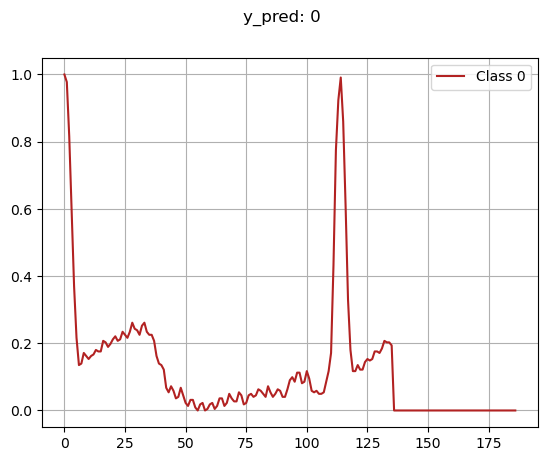

In [35]:
import random
n = random.randint(0,(len(x)))
x1 = x.iloc[n,:].values
yt = int(y.iloc[n])
p1 = int(ecg.predict(x1.reshape(1,-1))[0])
p2 = heart_diseases[p1]
print(f"-> at index number {n}\n\n",
      f"- Actual value: {yt}\n",
      f"- Predicted value: Class {p1}, {p2}", sep='', end='\n\n')
plt.grid()
plt.plot(x1, label=f"Class {yt}", c='firebrick')
plt.suptitle(f"y_pred: {p1}")
plt.legend(loc='upper right')
plt.show()

---